In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox, shapiro, skew
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier , AdaBoostClassifier
from sklearn import metrics


Reading Data set

In [2]:
df = pd.read_csv(r"C:\guvi_class\Project\cancer.csv")
df.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df.shape


(569, 33)

In [4]:
df.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Identifying Missing Columns

In [5]:
missing_values = df.isnull().sum()
print("Total Missing Values:")
print(missing_values)


Total Missing Values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension

In [6]:
unique_vlaues = df['Unnamed: 32'].unique()
print(unique_vlaues)


[nan]


Dropping Unwanted Columns

In [7]:
df.drop(columns = ["id","Unnamed: 32"], inplace = True)
df.head()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [8]:
df.shape


(569, 31)

In [9]:
df.describe().T


count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

Explorarty Data Analysis (EDA)

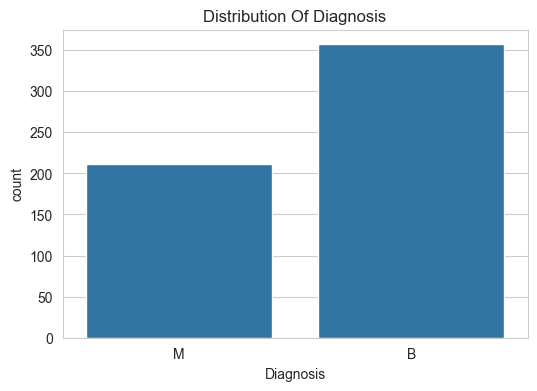

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis',data=df)
plt.title("Distribution Of Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("count")
plt.show()


In [11]:
numerical_features = df.select_dtypes(include=[float]).columns
numerical_features


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
skewness = df[numerical_features].skew()
print(skewness)


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

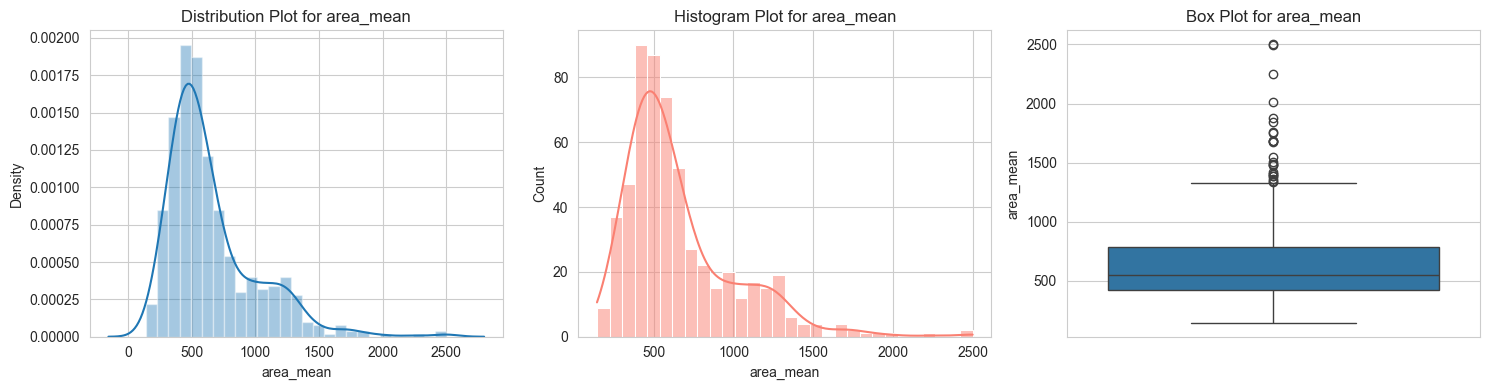

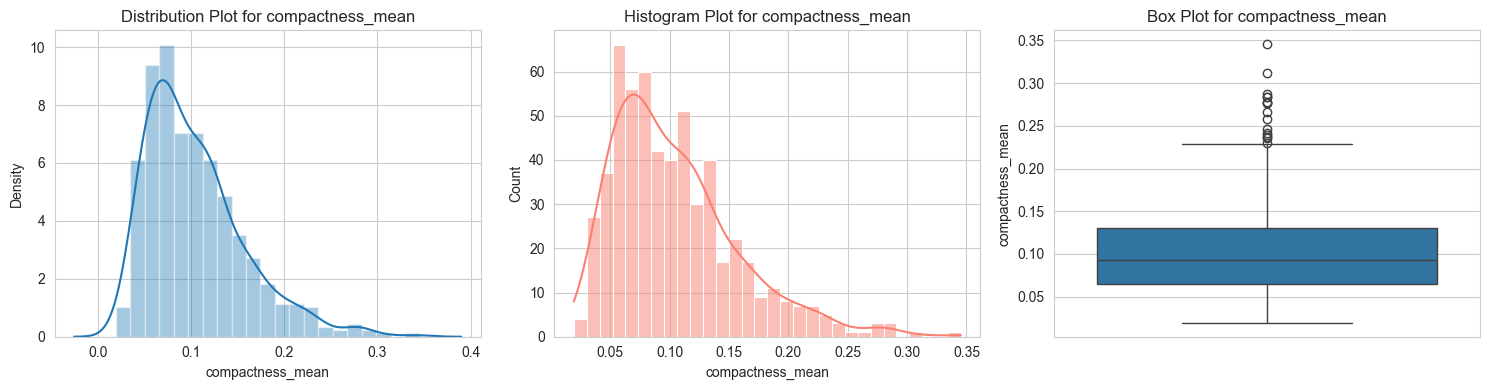

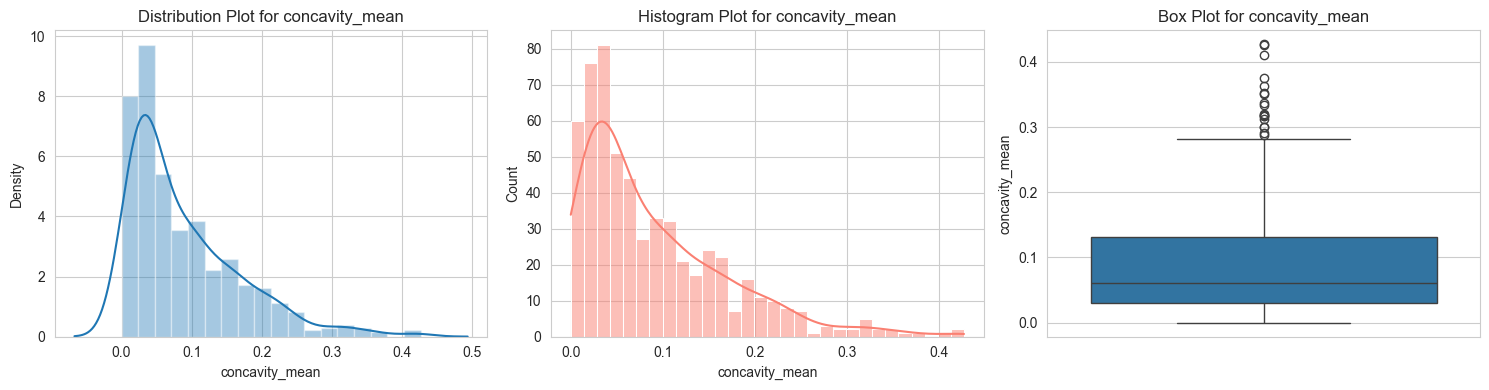

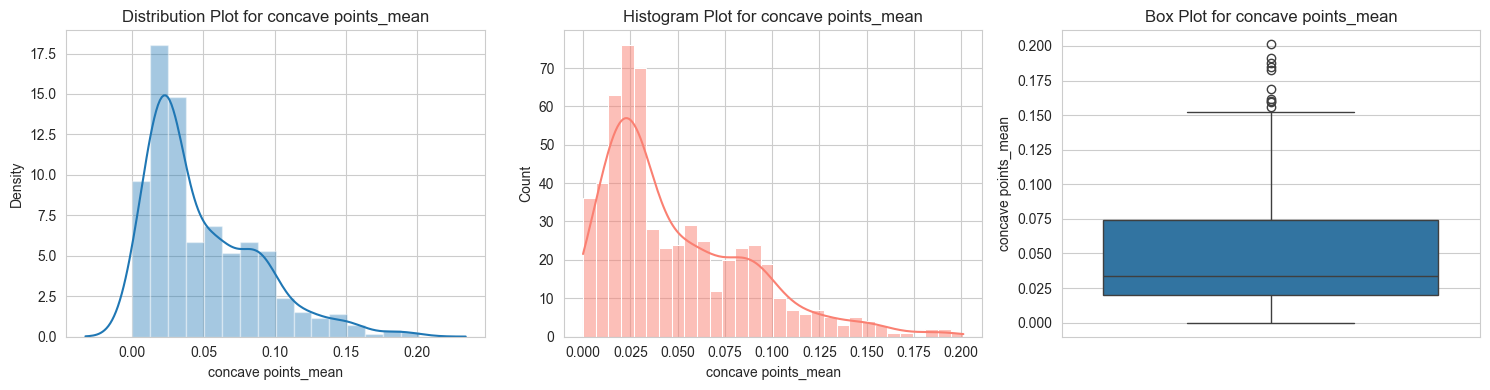

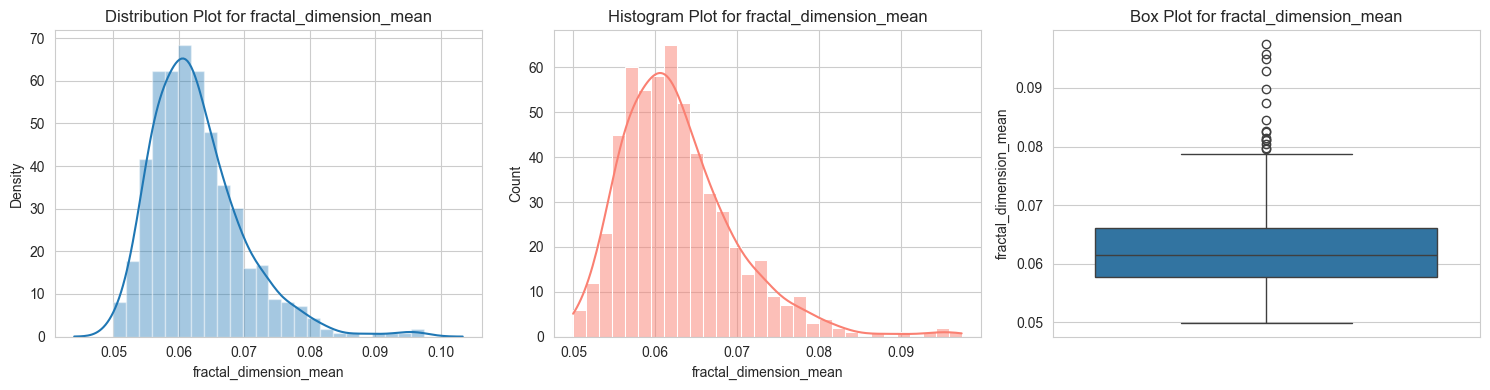

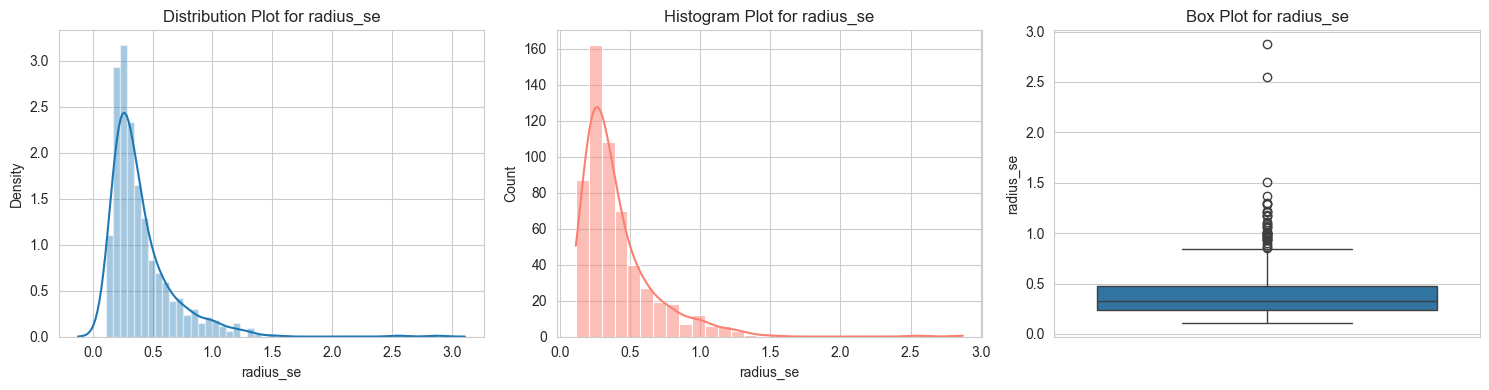

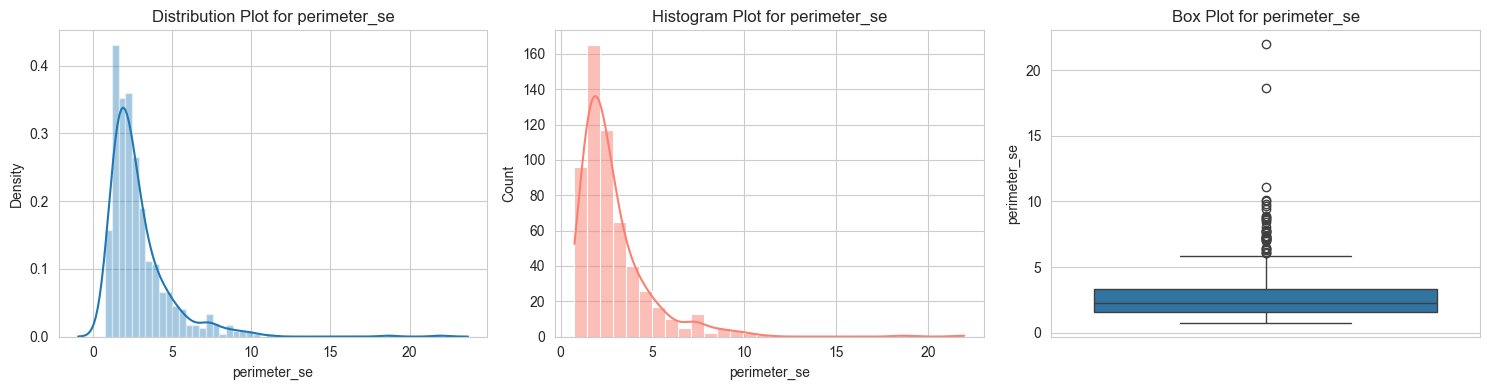

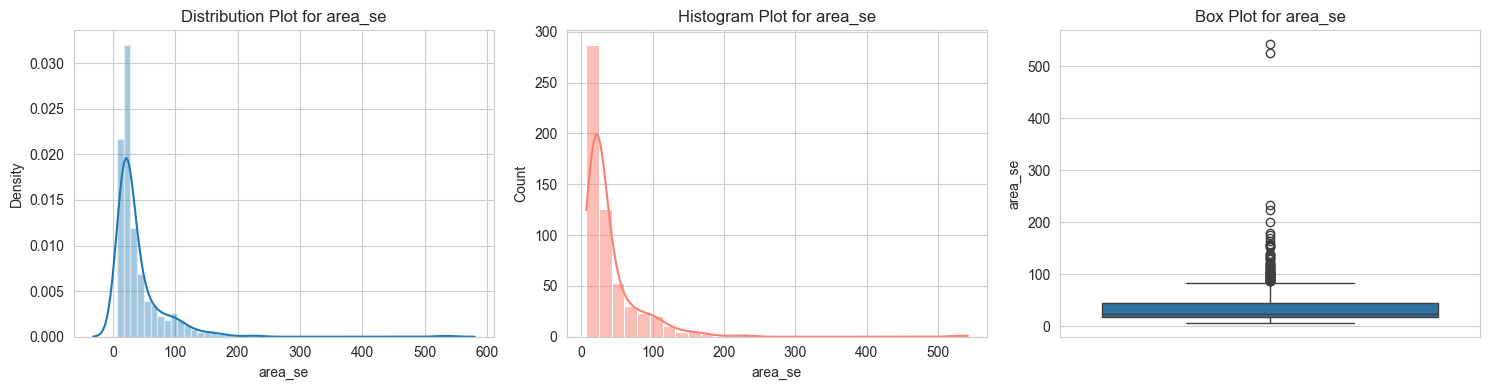

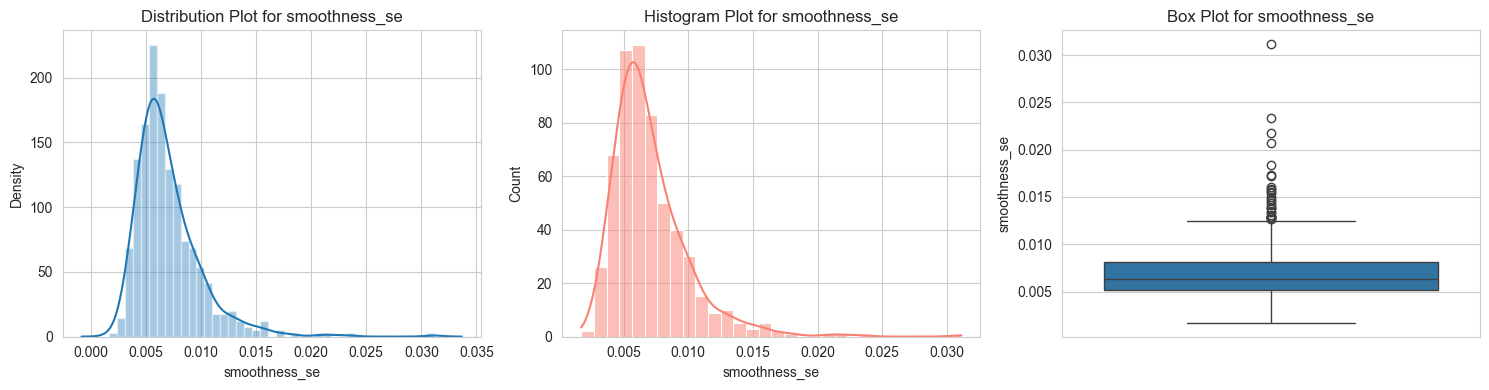

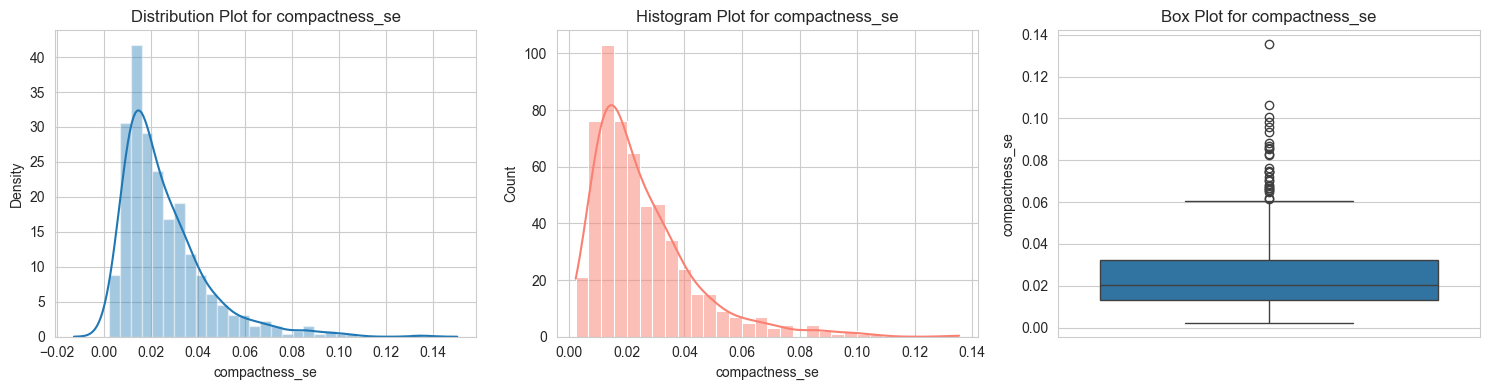

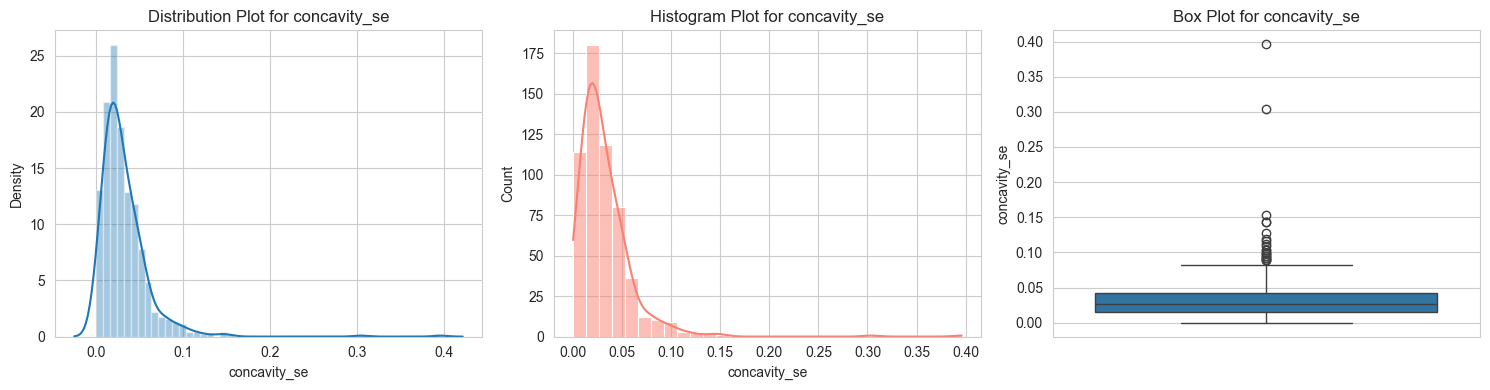

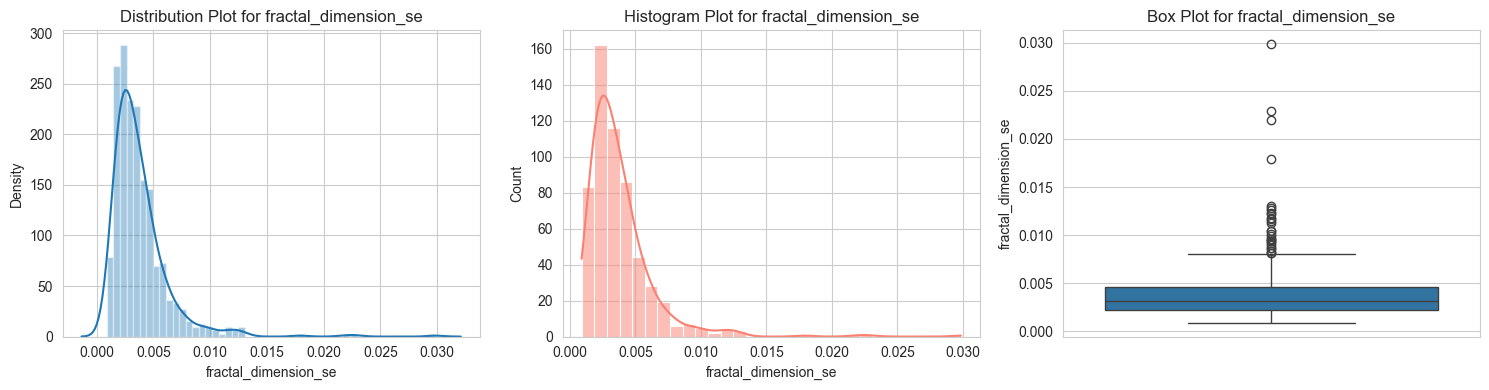

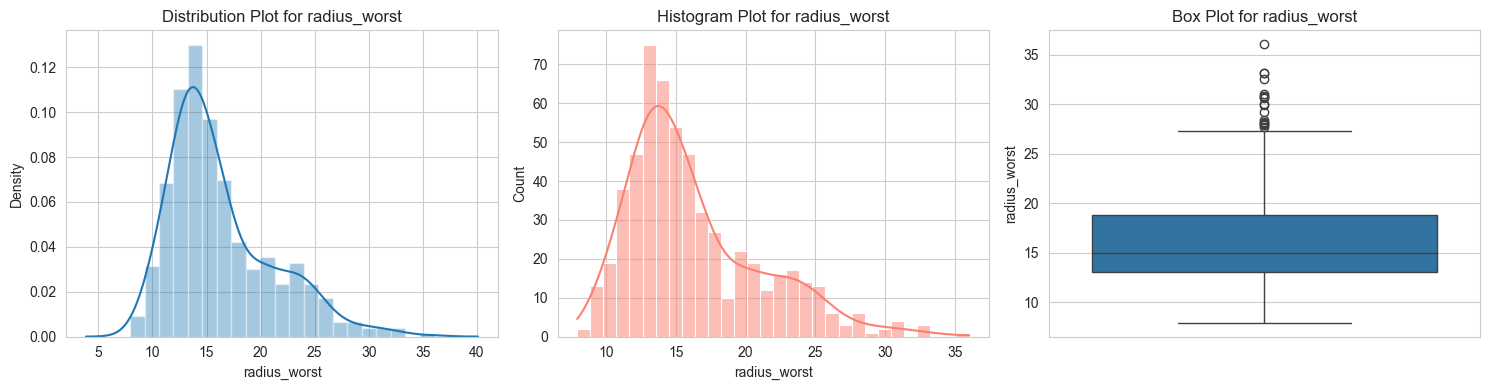

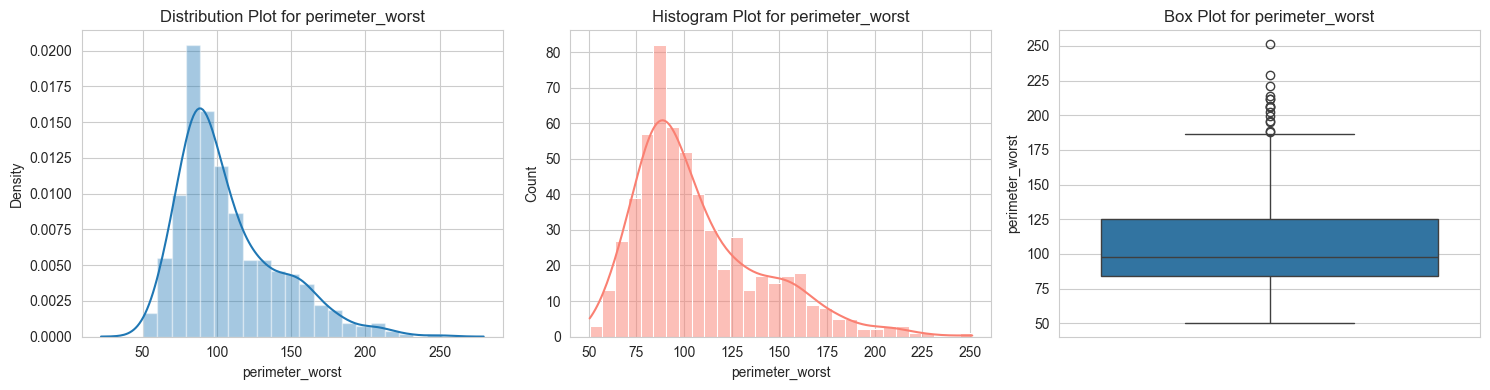

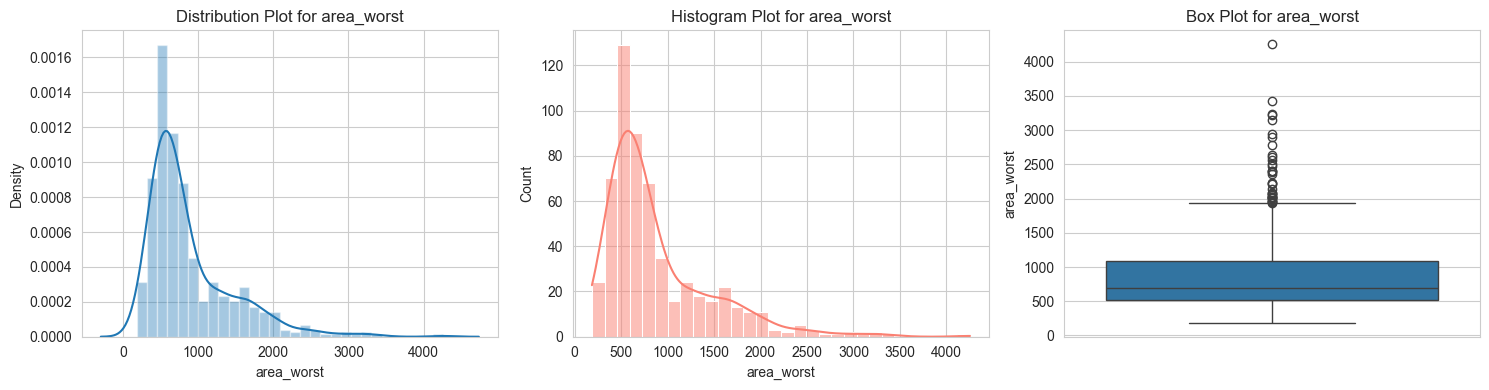

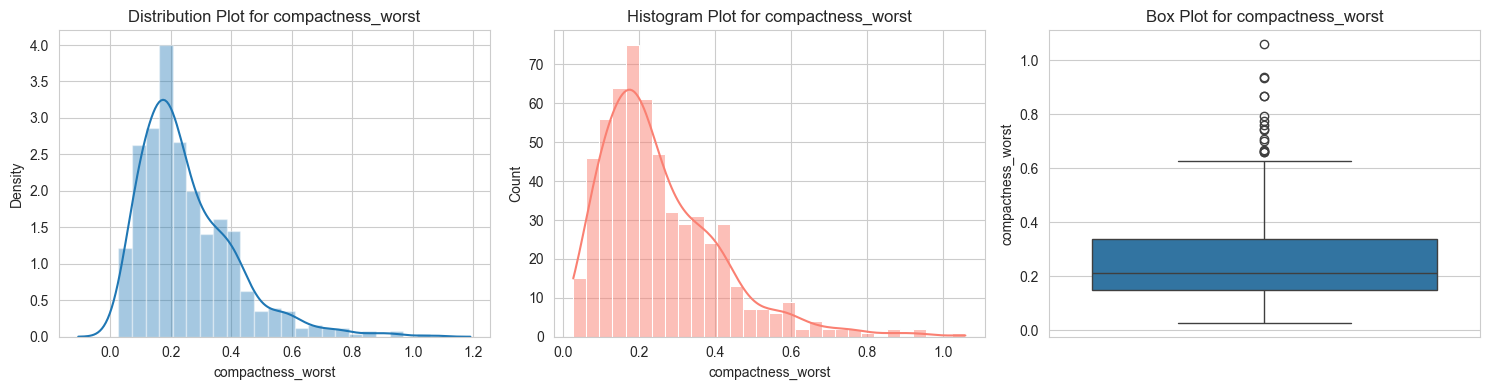

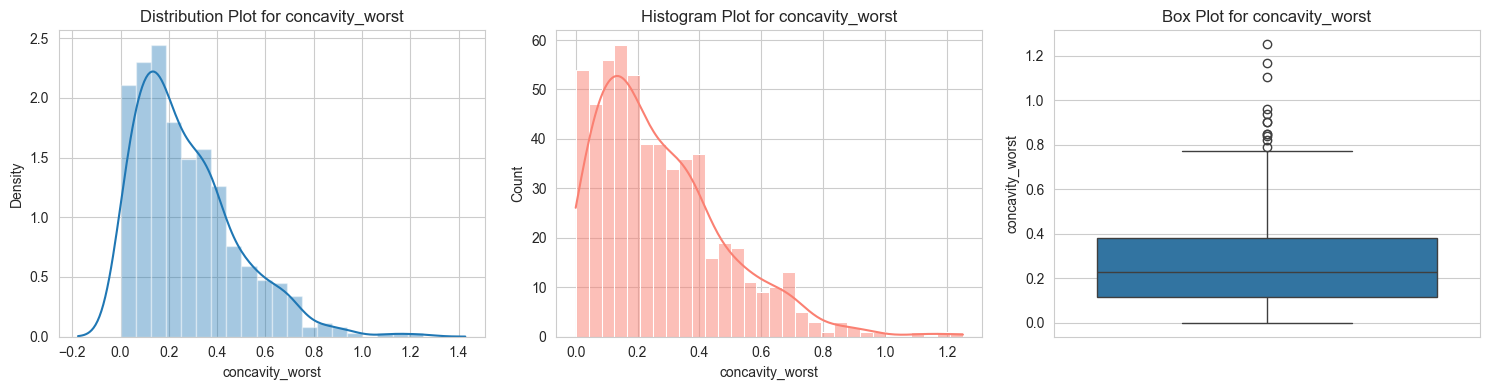

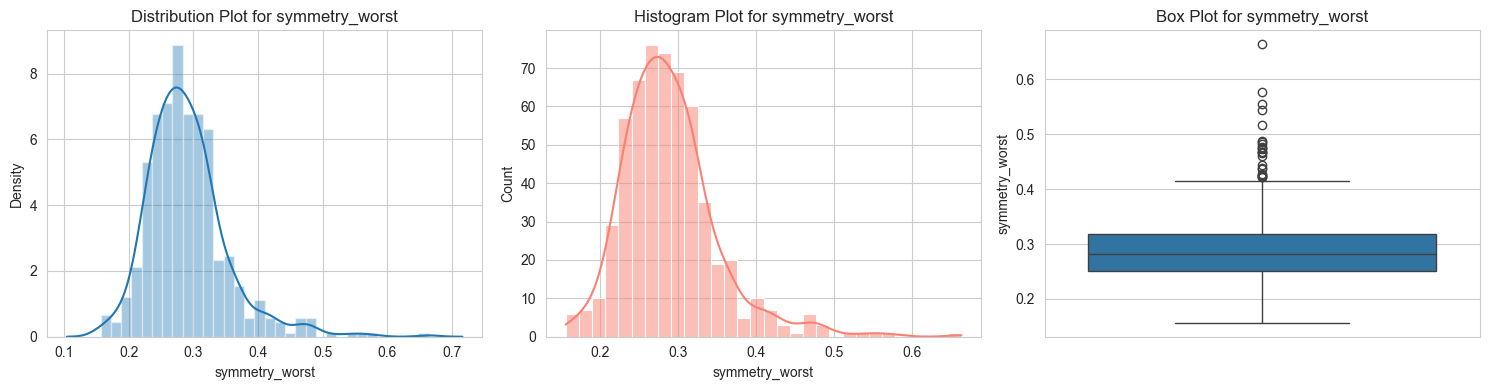

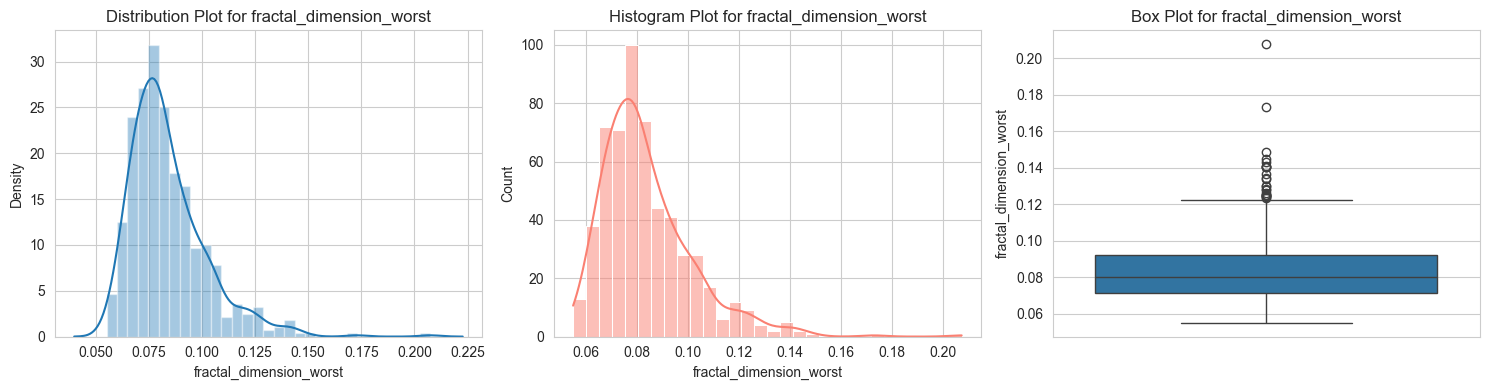

In [13]:
def plot_distribution(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 4))

        # Distribution plot
        plt.subplot(1, 3, 1)
        sns.distplot(df[column])
        plt.title("Distribution Plot for " + column)

        # Histogram plot
        plt.subplot(1, 3, 2)
        sns.histplot(df[column], kde=True, bins=30, color="salmon")
        plt.title("Histogram Plot for " + column)

        # Box plot
        plt.subplot(1, 3, 3)
        sns.boxplot(df[column])
        plt.title("Box Plot for " + column)

        plt.tight_layout()
        plt.show()

# List of columns suspected to be skewed
skewed_columns = ['area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                  'fractal_dimension_mean', 'radius_se', 'perimeter_se', 'area_se', 
                  'smoothness_se', 'compactness_se', 'concavity_se', 'fractal_dimension_se', 
                  'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 
                  'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Plot skewness for each column
plot_distribution(df, skewed_columns)


In [14]:
skewed_columns = ['area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                  'fractal_dimension_mean', 'radius_se', 'perimeter_se', 'area_se', 
                  'smoothness_se', 'compactness_se', 'concavity_se', 'fractal_dimension_se', 
                  'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 
                  'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

df[skewed_columns] = df[skewed_columns].apply(lambda x: np.sqrt(x))


In [15]:
skewness_after_transformation = df[skewed_columns].skew()
print("Skewness after transformation:")
print(skewness_after_transformation)


Skewness after transformation:
area_mean                  0.933839
compactness_mean           0.564793
concavity_mean             0.360016
concave points_mean        0.243789
fractal_dimension_mean     1.068065
radius_se                  1.477656
perimeter_se               1.635855
area_se                    2.141981
smoothness_se              1.206641
compactness_se             0.903304
concavity_se               0.937892
fractal_dimension_se       1.765806
radius_worst               0.783175
perimeter_worst            0.786099
area_worst                 1.107839
compactness_worst          0.604870
concavity_worst            0.027867
symmetry_worst             0.890223
fractal_dimension_worst    1.180458
dtype: float64


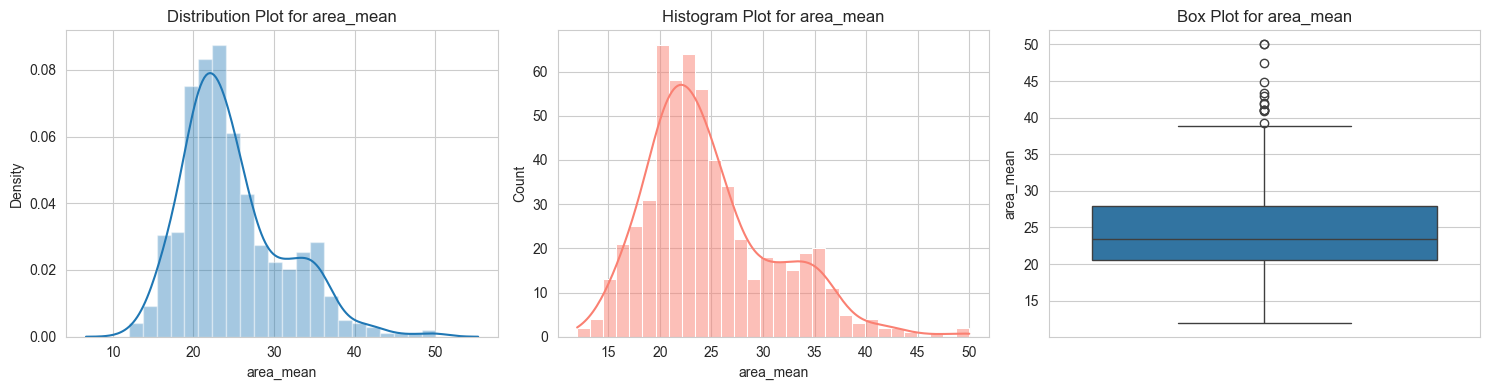

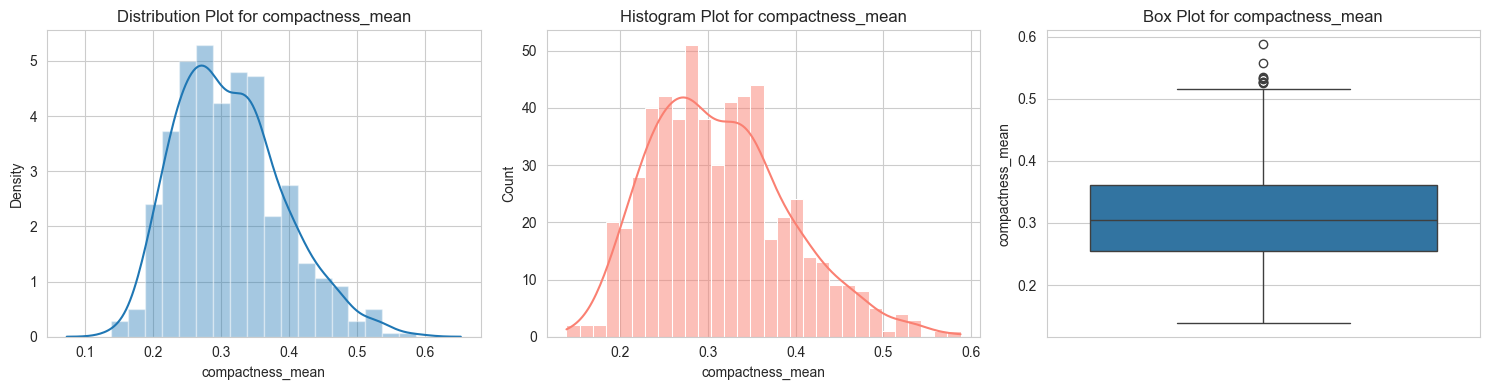

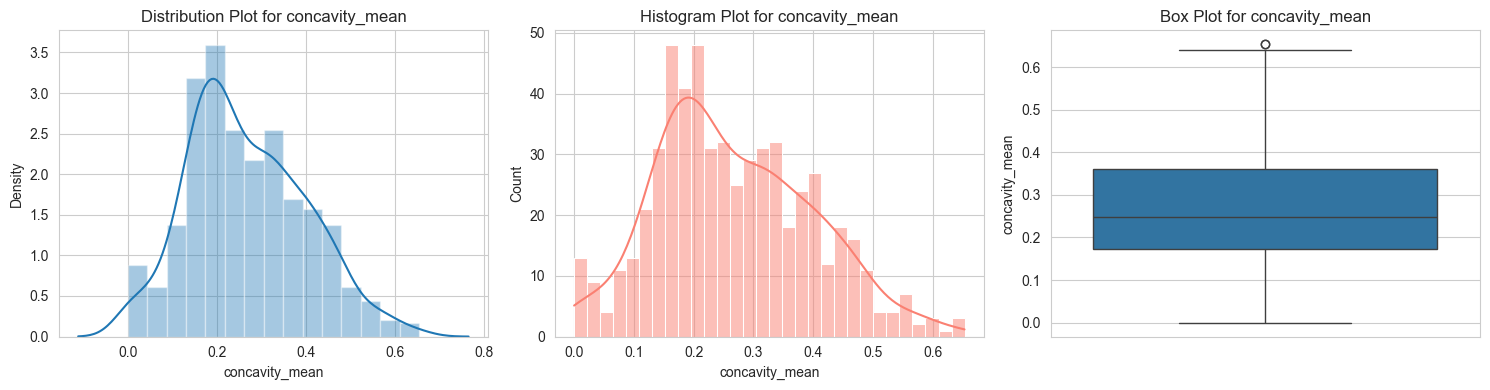

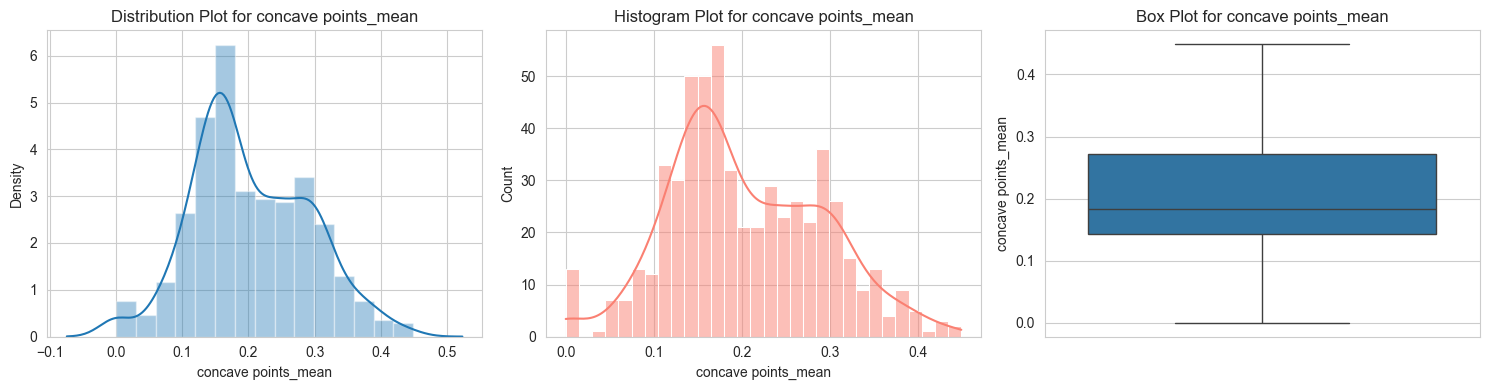

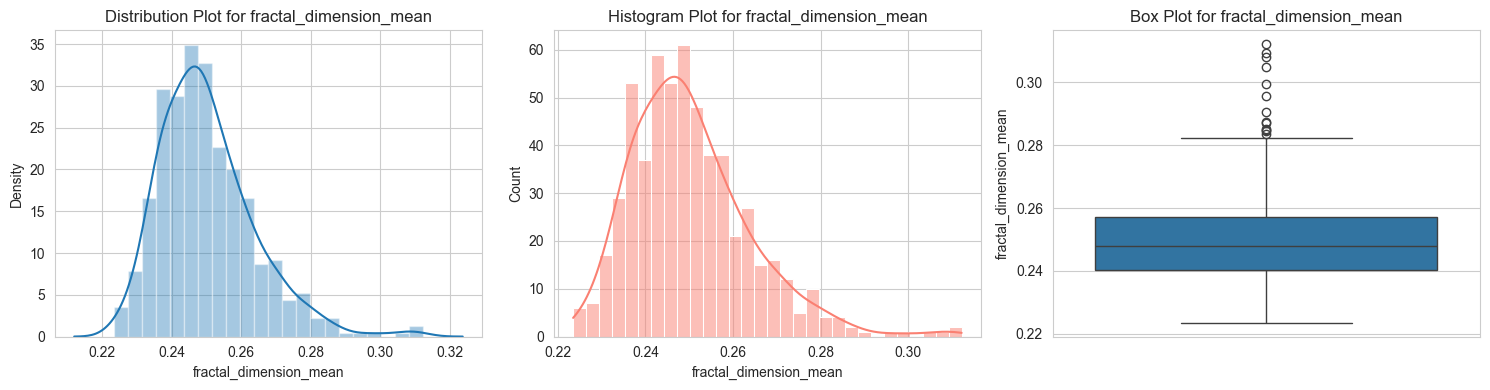

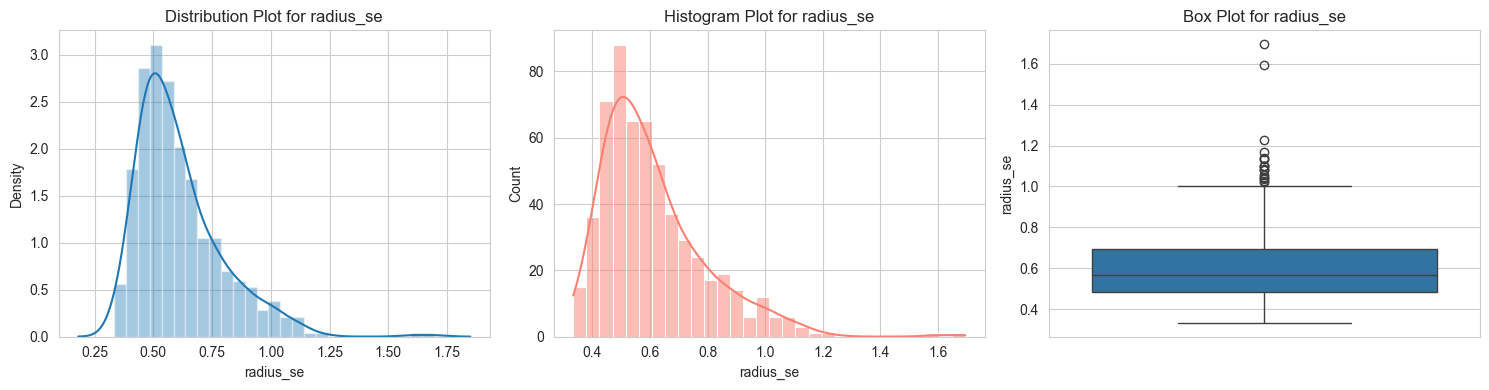

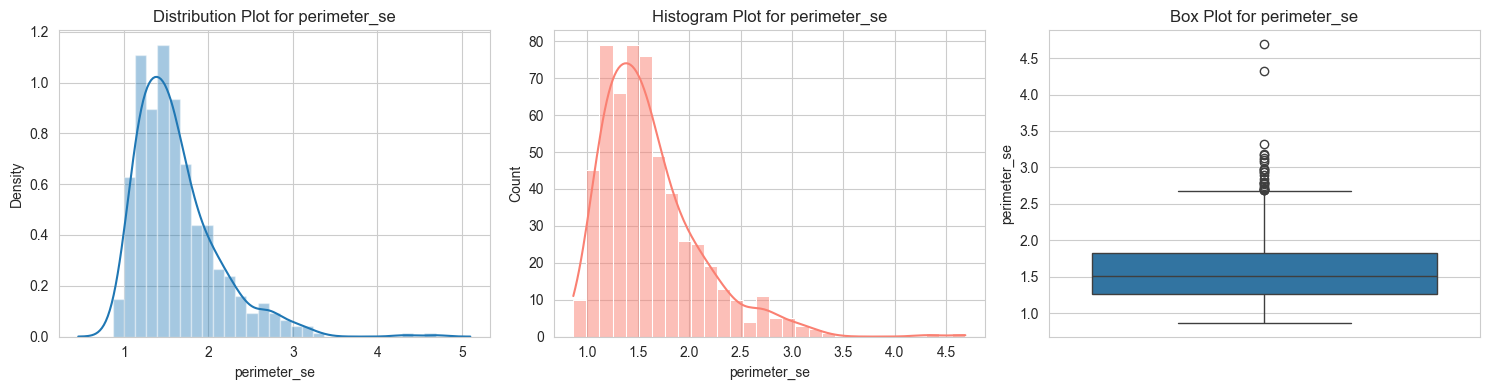

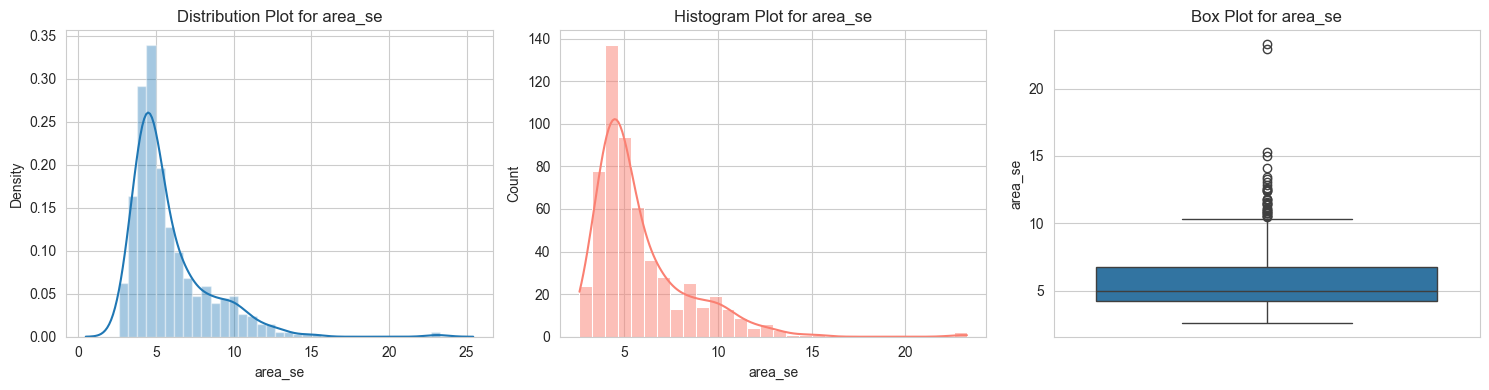

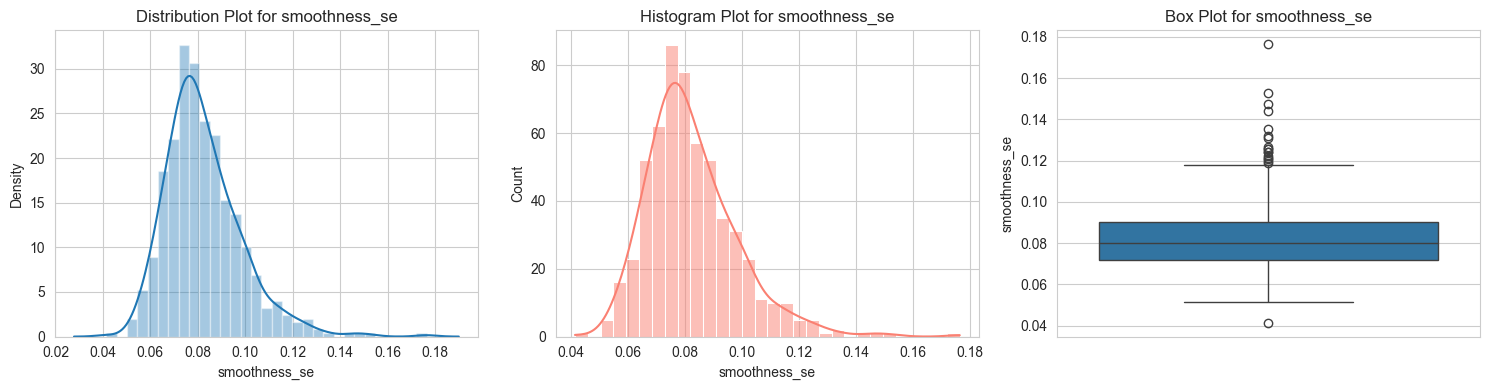

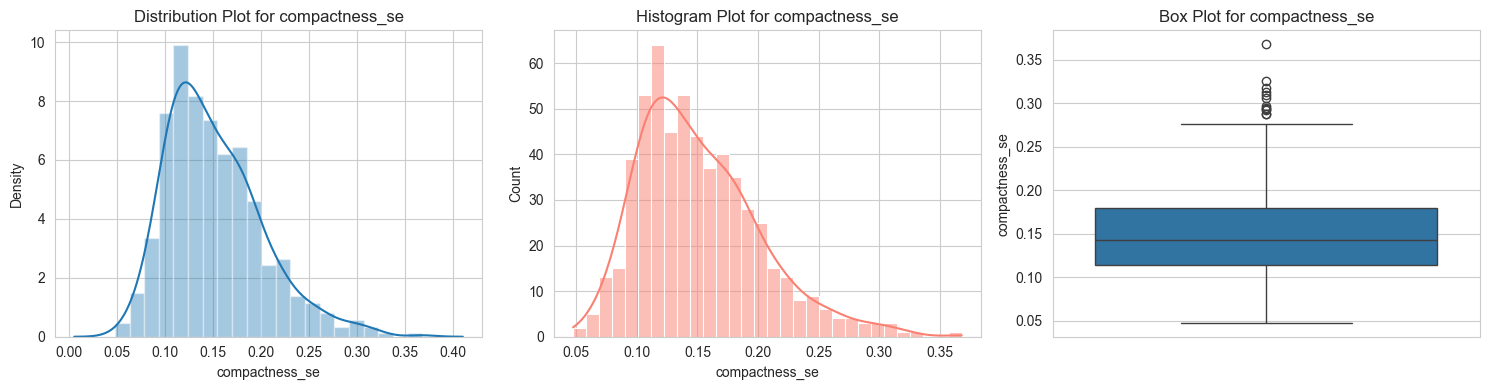

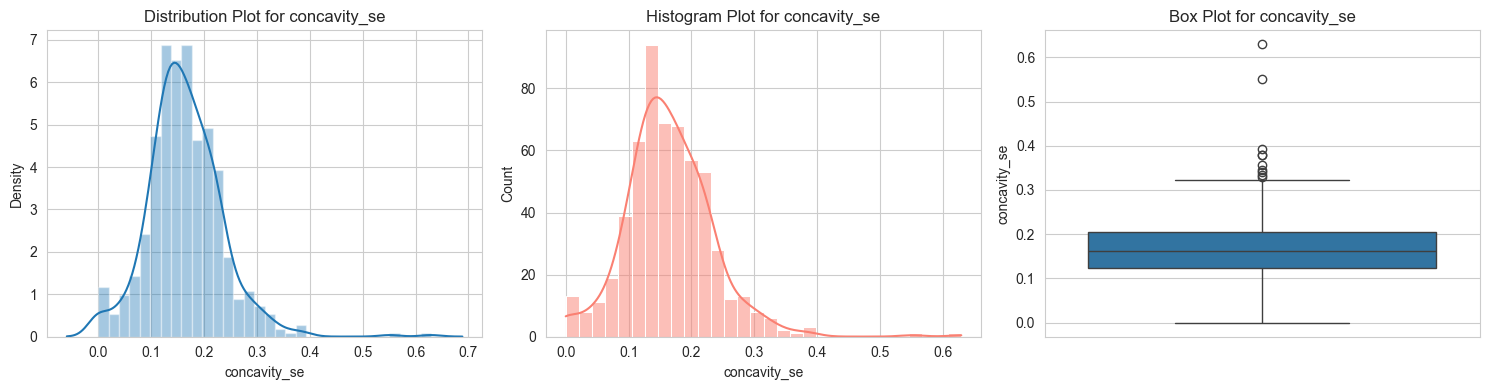

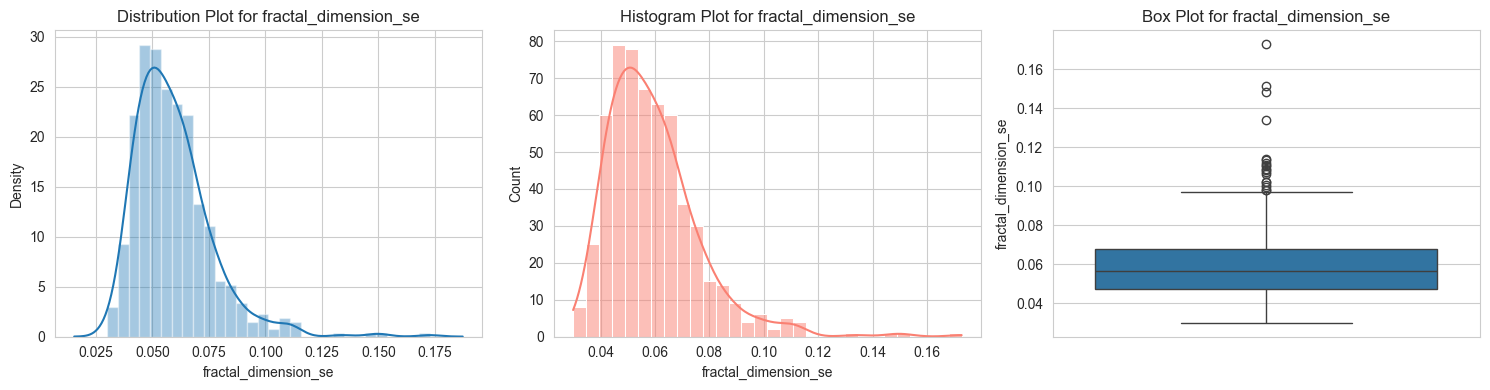

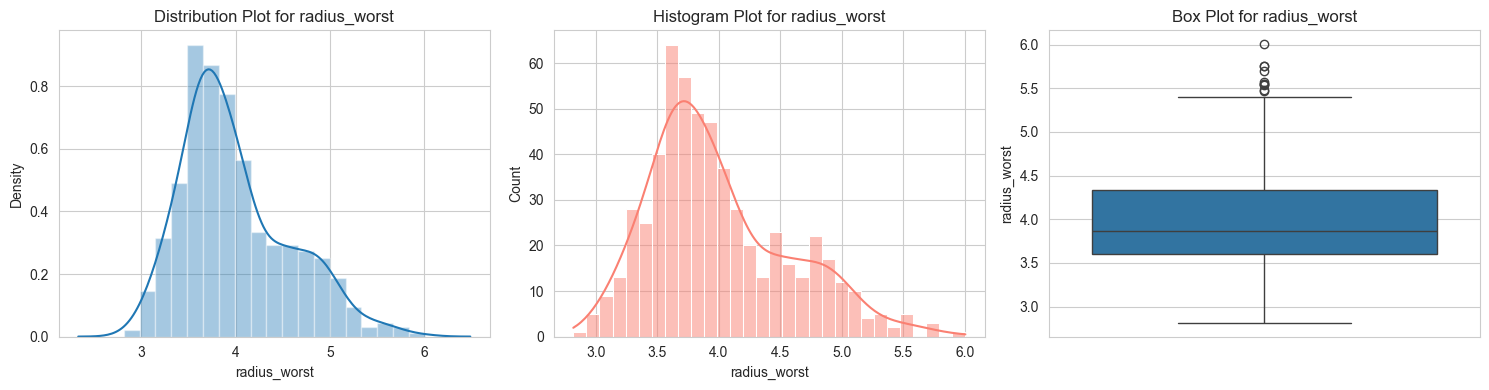

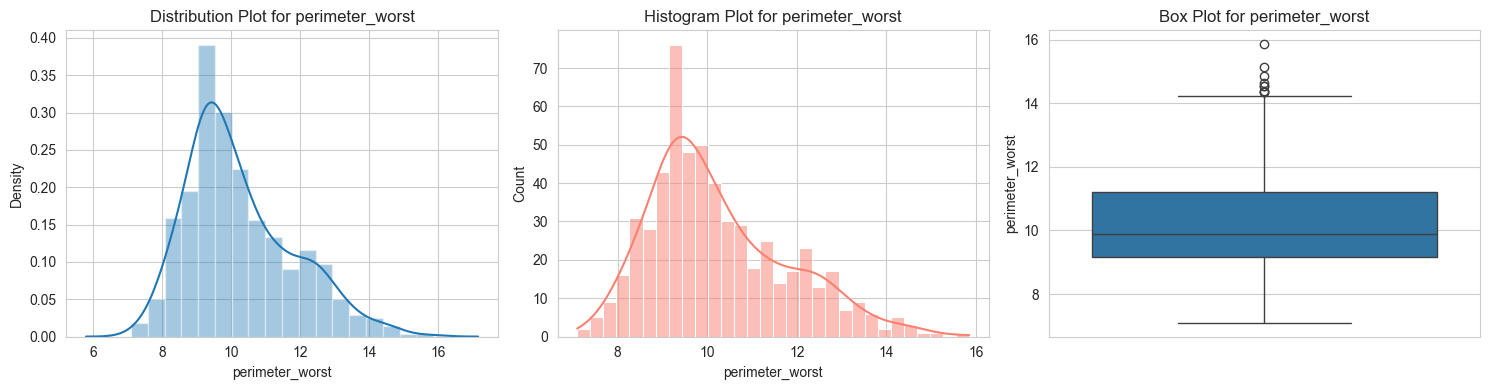

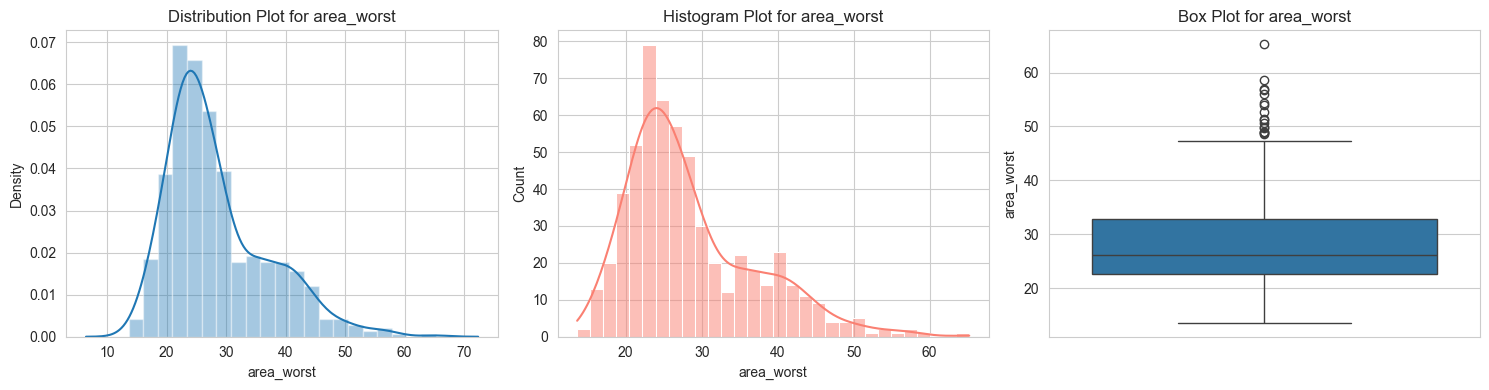

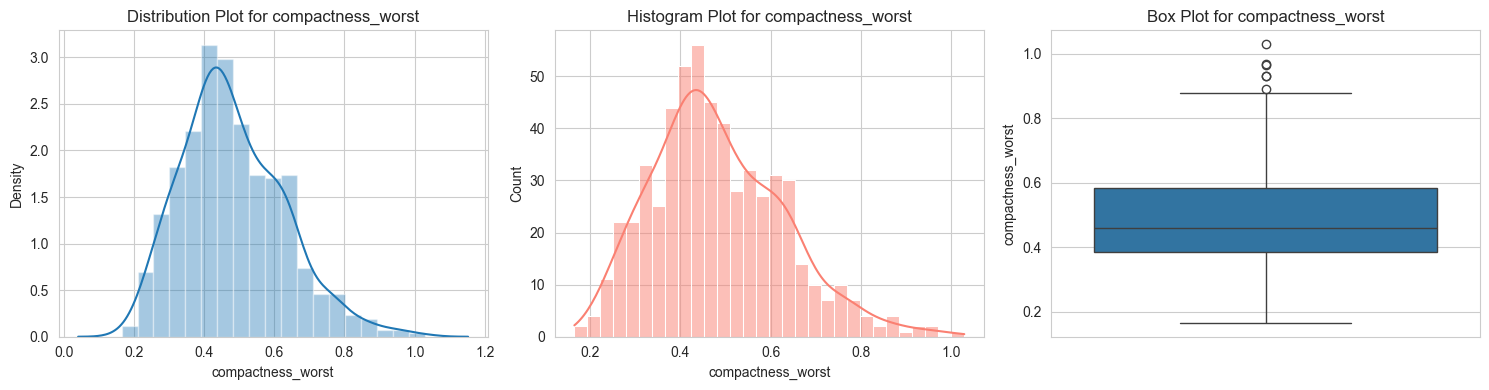

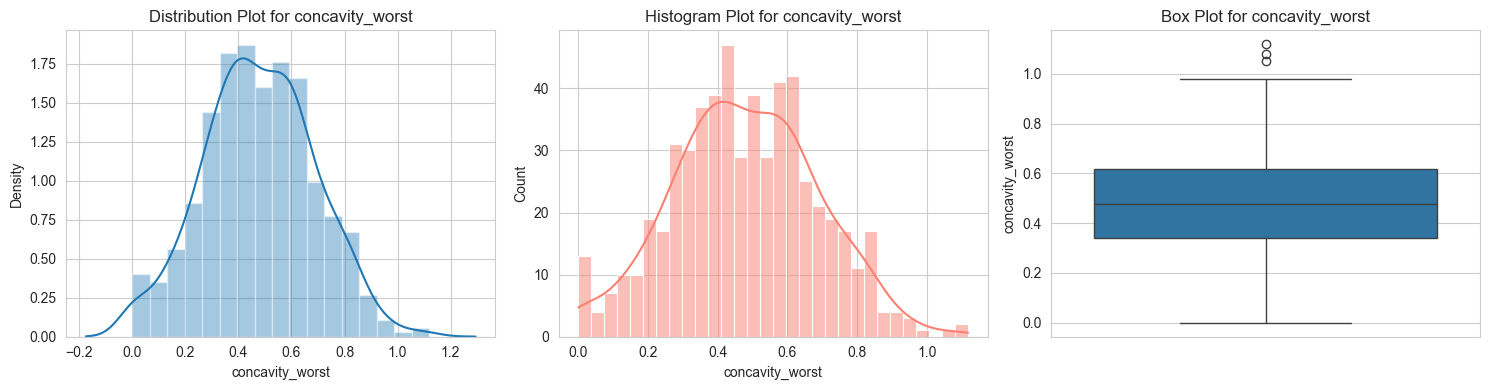

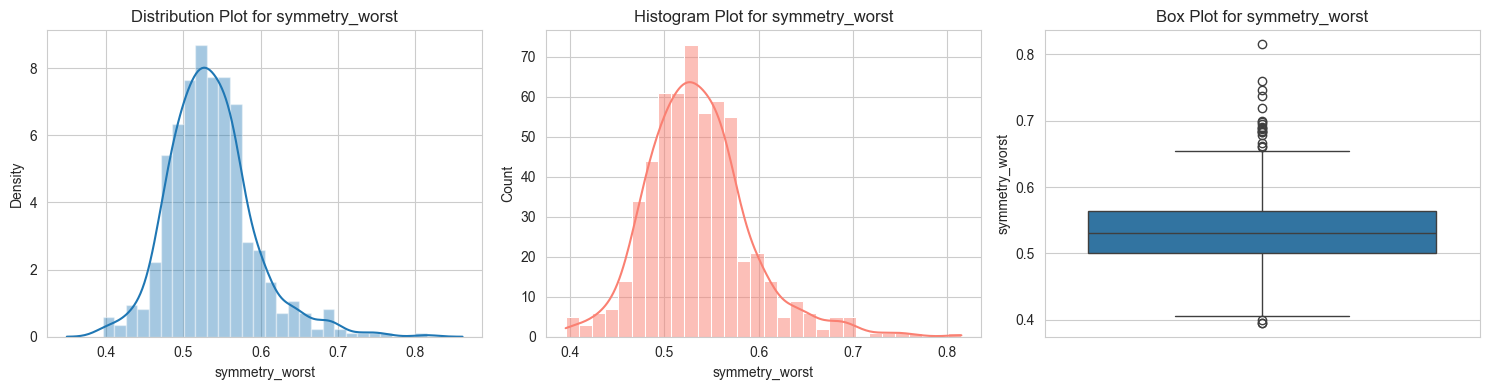

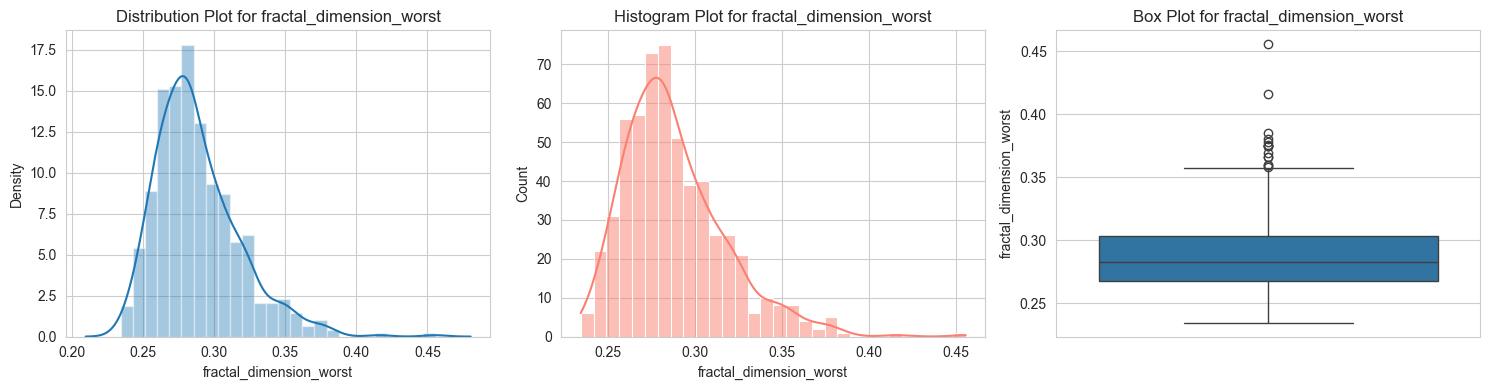

In [16]:
plot_distribution(df,skewed_columns)


In [17]:
df1 = df.copy()
df1.head()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80  31.638584   
1         M        20.57         17.77          132.90  36.414283   
2         M        19.69         21.25          130.00  34.684290   
3         M        11.42         20.38           77.58  19.649427   
4         M        20.29         14.34          135.10  36.013886   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840          0.526878        0.547814             0.383536   
1          0.08474          0.280428        0.294788             0.264896   
2          0.10960          0.399875        0.444297             0.357631   
3          0.14250          0.532823        0.491325             0.324345   
4          0.10030          0.364417        0.444972             0.322955   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...      5.037857          17.33        13.586758   
1         0.1812  ...      4.999000          23.41        12.601587   
2         0.2069  ...      4.854894          25.53        12.349089   
3         0.2597  ...      3.861347          26.50         9.943339   
4         0.1809  ...      4.747631          16.67        12.336936   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0   44.933284            0.1622           0.815843         0.843742   
1   44.226689            0.1238           0.431972         0.491528   
2   41.340053            0.1444           0.651537         0.671118   
3   23.826456            0.2098           0.930752         0.828794   
4   39.686270            0.1374           0.452769         0.632456   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654        0.678307                 0.344819  
1                0.1860        0.524404                 0.298362  
2                0.2430        0.601082                 0.295939  
3                0.2575        0.814739                 0.415933  
4                0.1625        0.486210                 0.277092  

[5 rows x 31 columns]

In [18]:
df1.describe()


radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   569.000000    569.000000      569.000000  569.000000       569.000000   
mean     14.127292     19.289649       91.969033   24.812790         0.096360   
std       3.524049      4.301036       24.298981    6.267663         0.014064   
min       6.981000      9.710000       43.790000   11.979149         0.052630   
25%      11.700000     16.170000       75.170000   20.501219         0.086370   
50%      13.370000     18.840000       86.240000   23.475519         0.095870   
75%      15.780000     21.800000      104.100000   27.976776         0.105300   
max      28.110000     39.280000      188.500000   50.009999         0.163400   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        569.000000      569.000000           569.000000     569.000000   
mean           0.313519        0.267354             0.203053       0.181162   
std            0.077829        0.131725             0.087761       0.027414   
min            0.139212        0.000000             0.000000       0.106000   
25%            0.254794        0.171930             0.142513       0.161900   
50%            0.304352        0.248073             0.183030       0.179200   
75%            0.361109        0.361525             0.272029       0.195700   
max            0.587707        0.653299             0.448553       0.304000   

       fractal_dimension_mean  ...  radius_worst  texture_worst  \
count              569.000000  ...    569.000000     569.000000   
mean                 0.250221  ...      3.992930      25.677223   
std                  0.013695  ...      0.571207       6.146258   
min                  0.223517  ...      2.816026      12.020000   
25%                  0.240208  ...      3.606938      21.080000   
50%                  0.248073  ...      3.869108      25.410000   
75%                  0.257138  ...      4.334743      29.720000   
max                  0.312154  ...      6.003332      49.540000   

       perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
count       569.000000  569.000000        569.000000         569.000000   
mean         10.241311   28.441644          0.132369           0.482504   
std           1.543034    8.472434          0.022832           0.146602   
min           7.100000   13.608821          0.071170           0.165197   
25%           9.171150   22.700220          0.116600           0.383667   
50%           9.882307   26.201145          0.131300           0.460326   
75%          11.198214   32.924155          0.146000           0.582323   
max          15.849290   65.222695          0.222600           1.028591   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.478503              0.114606        0.535777   
std           0.208085              0.065732        0.054989   
min           0.000000              0.000000        0.395601   
25%           0.338378              0.064930        0.500400   
50%           0.476130              0.099930        0.531225   
75%           0.618789              0.161400        0.563826   
max           1.118928              0.291000        0.814739   

       fractal_dimension_worst  
count               569.000000  
mean                  0.288236  
std                   0.029450  
min                   0.234606  
25%                   0.267320  
50%                   0.282913  
75%                   0.303447  
max                   0.455522  

[8 rows x 30 columns]

In [19]:
Q1 = df1[numerical_features].quantile(0.25)
Q3 = df1[numerical_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df1[numerical_features] < lower_bound) | (df1[numerical_features] > upper_bound)).any(axis=1)

outlier_count = outliers.sum()
outlier_percentage = (outlier_count / len(df1)) * 100

print(f"Total number of outliers: {outlier_count}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")


Total number of outliers: 121
Percentage of outliers: 21.27%


In [20]:
df1[numerical_features] = df1[numerical_features].clip(lower_bound, upper_bound, axis=1)


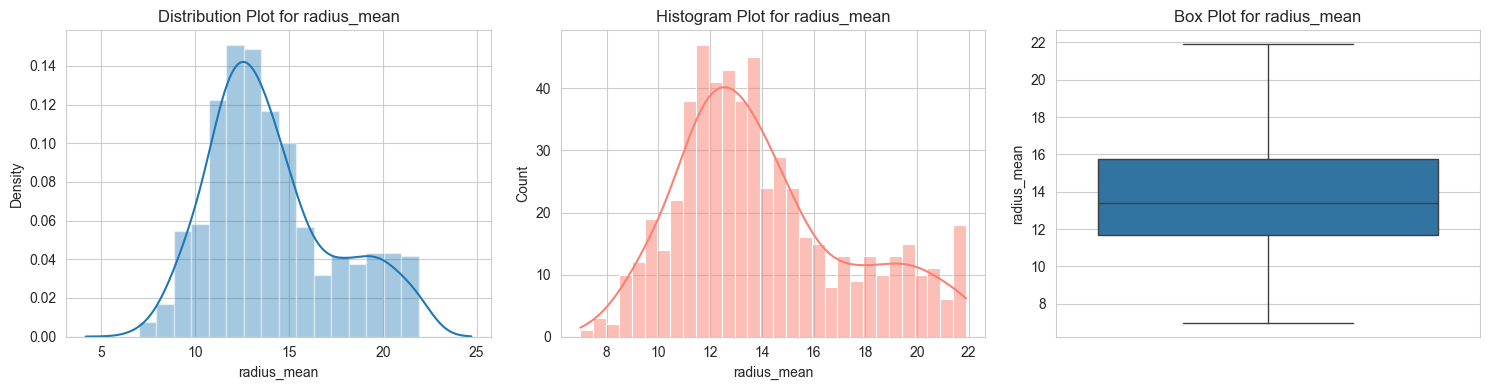

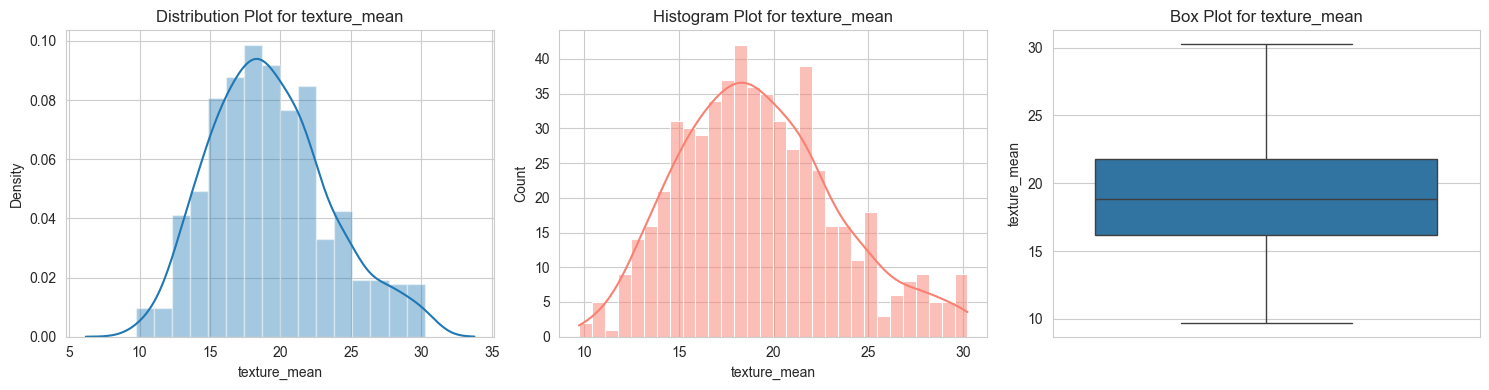

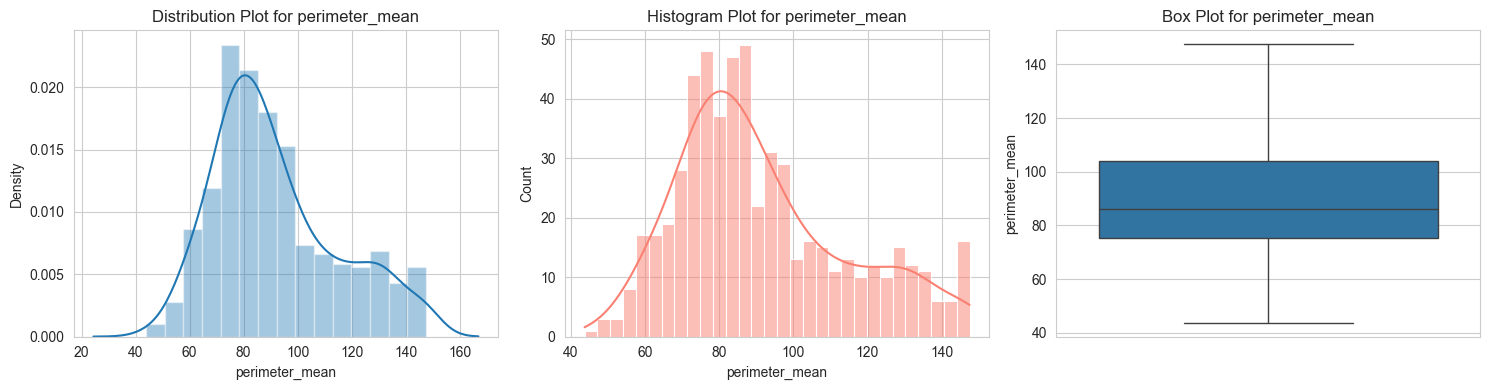

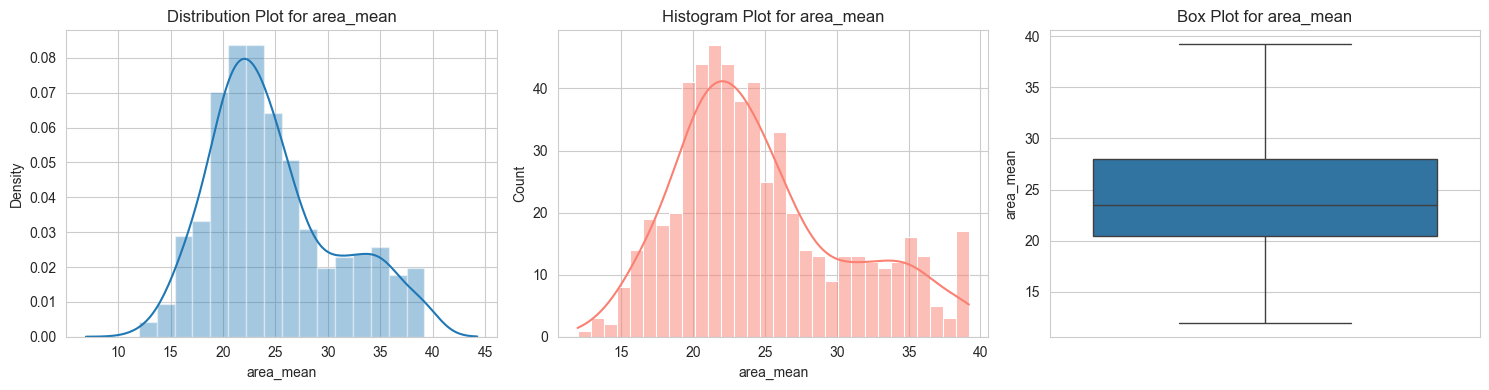

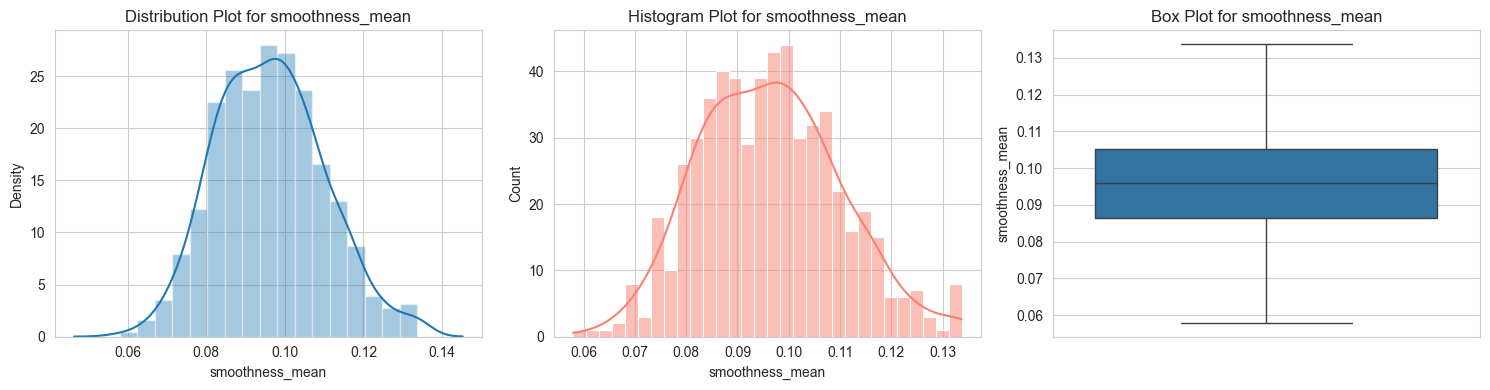

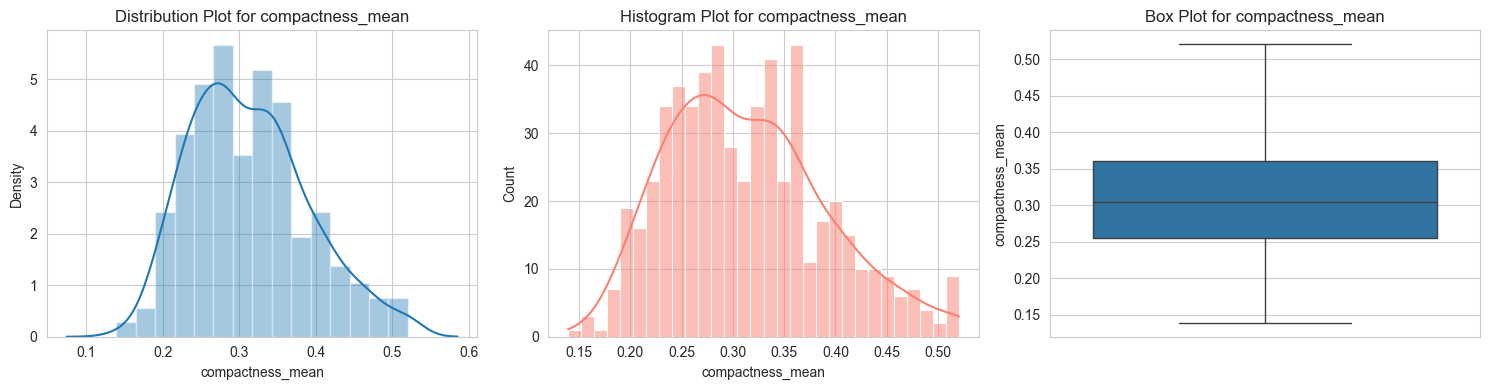

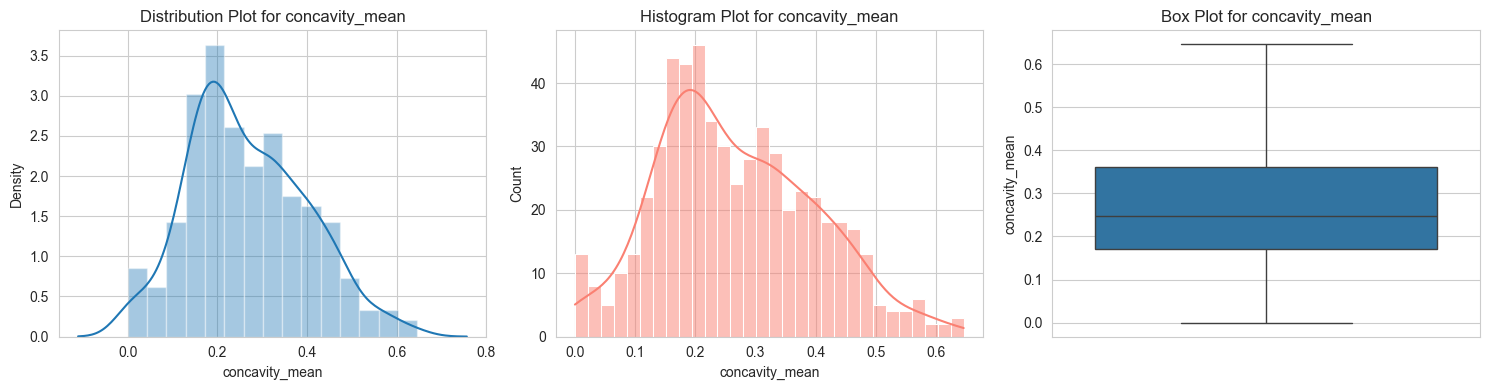

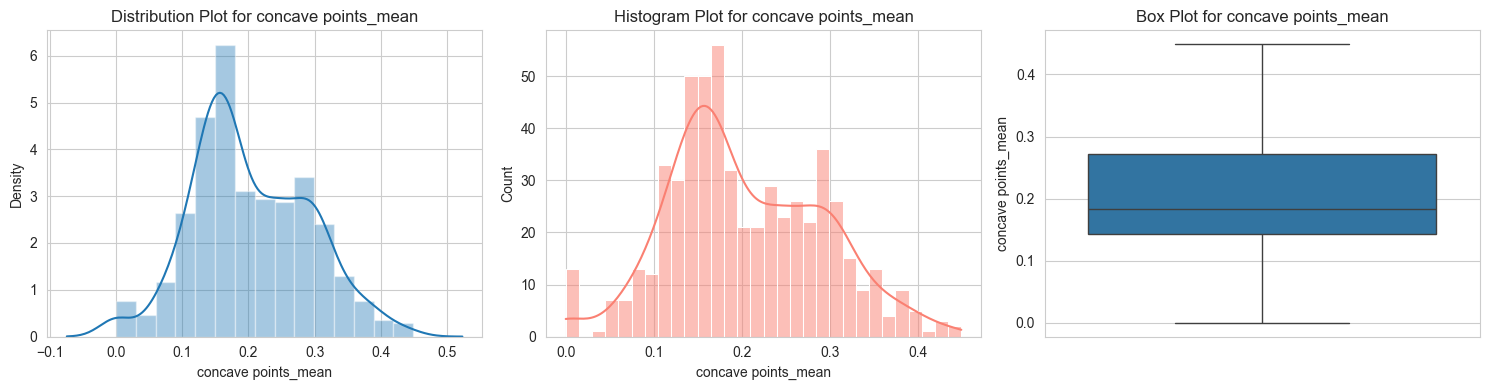

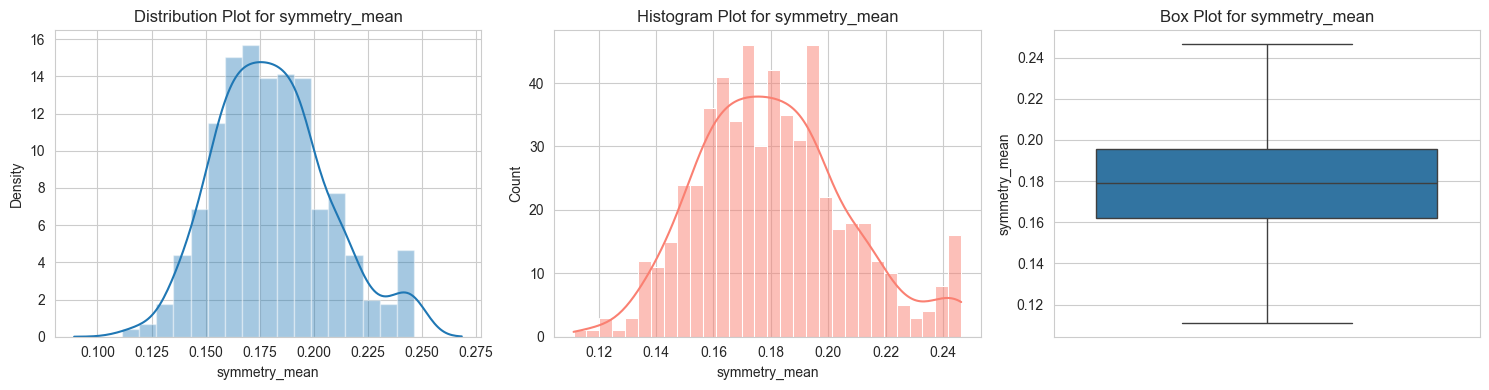

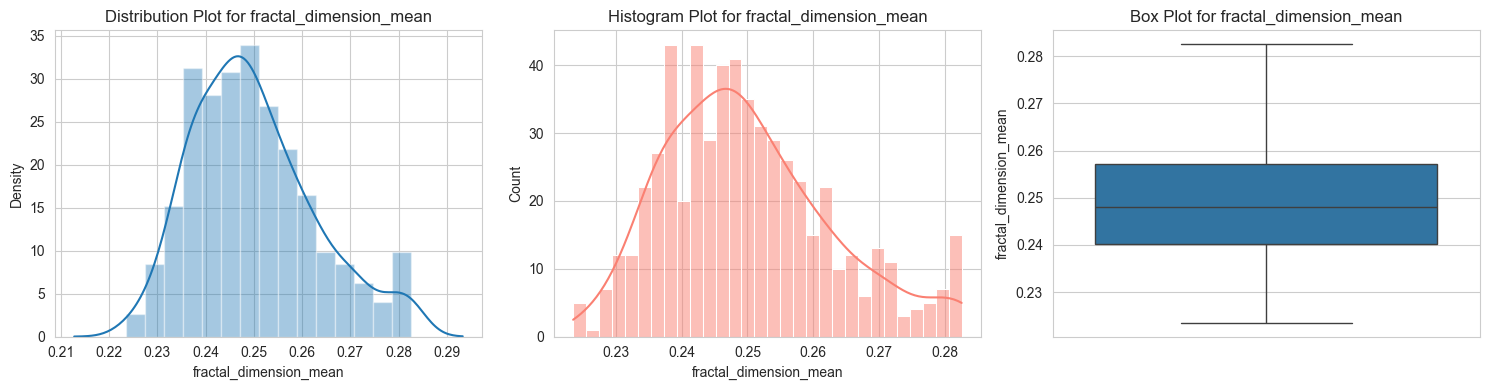

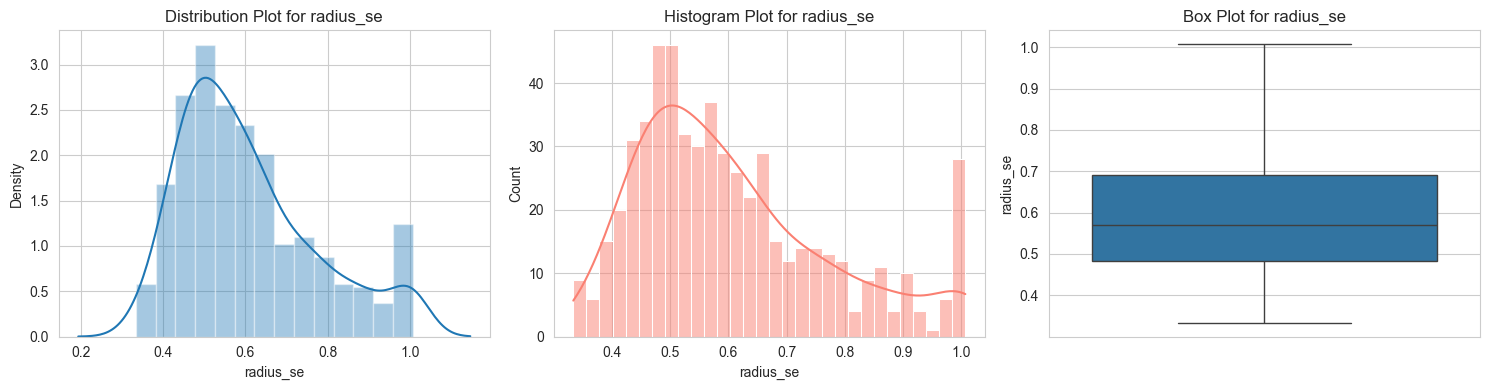

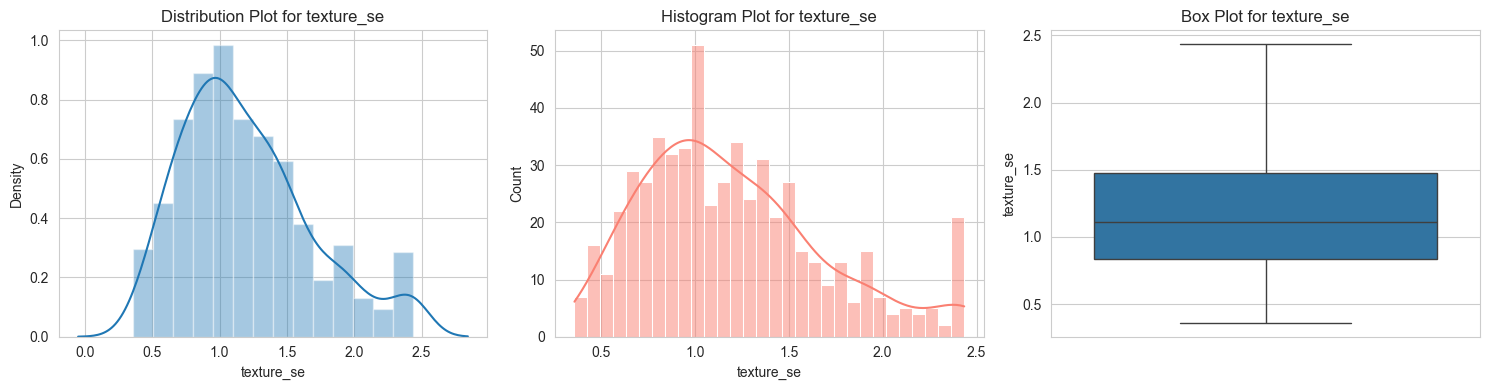

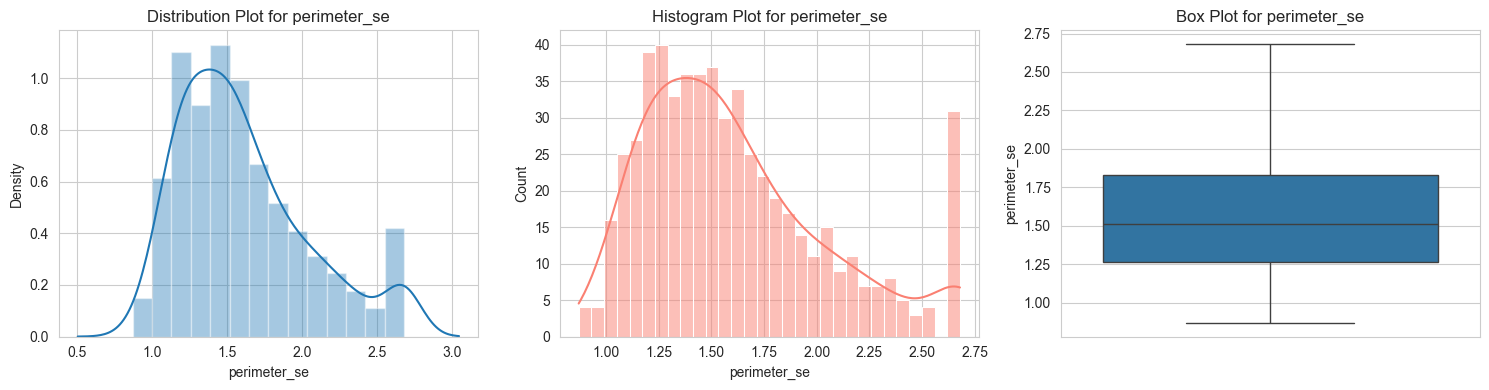

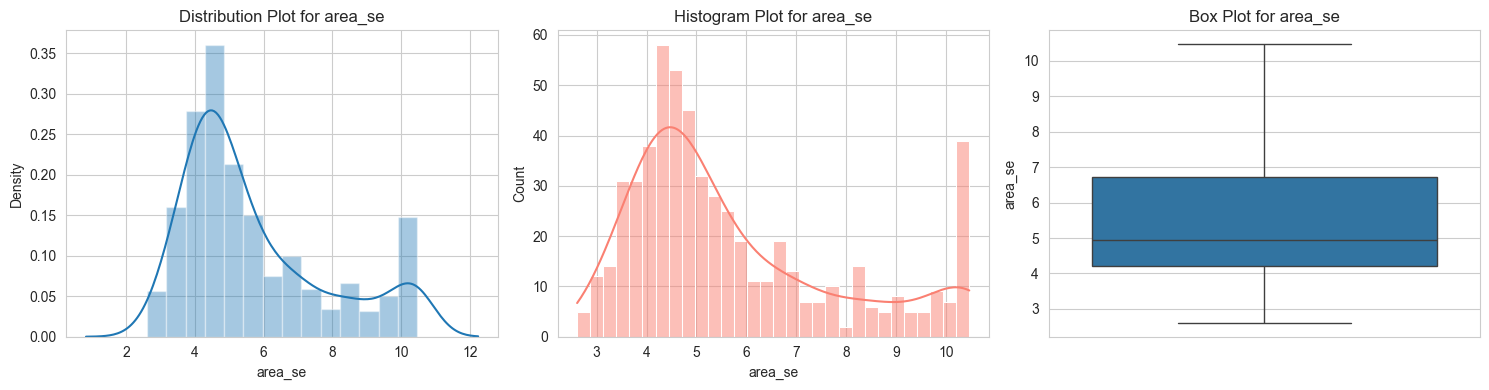

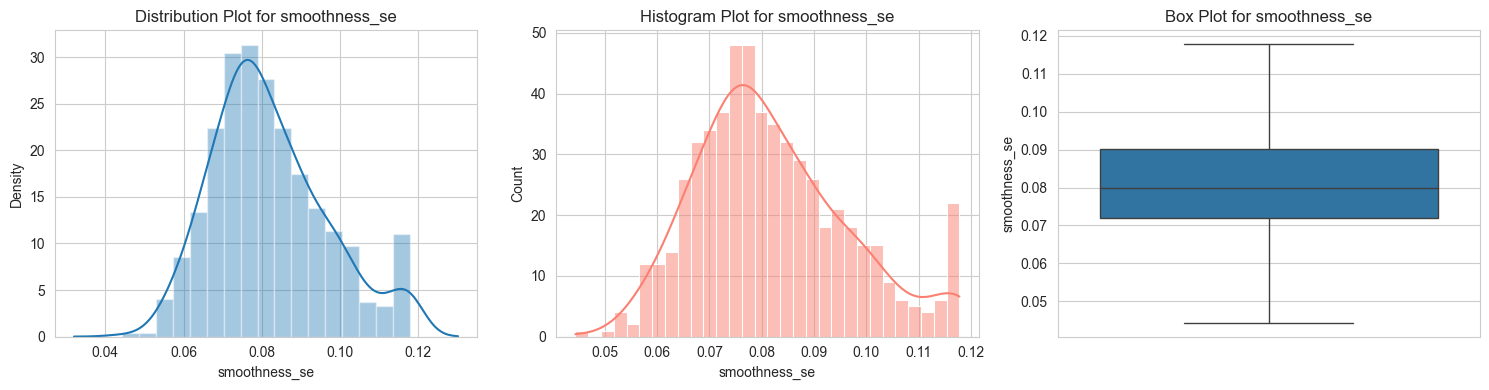

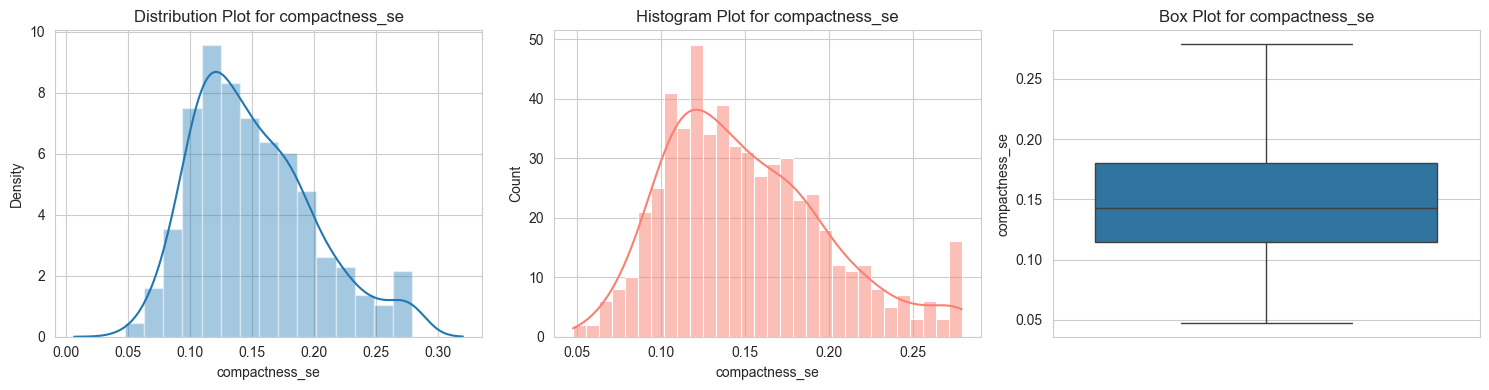

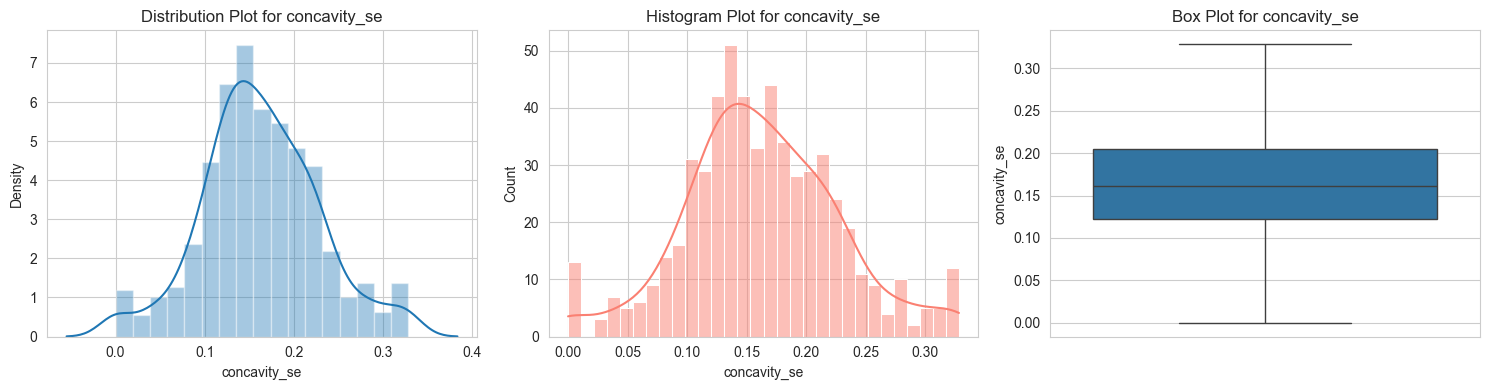

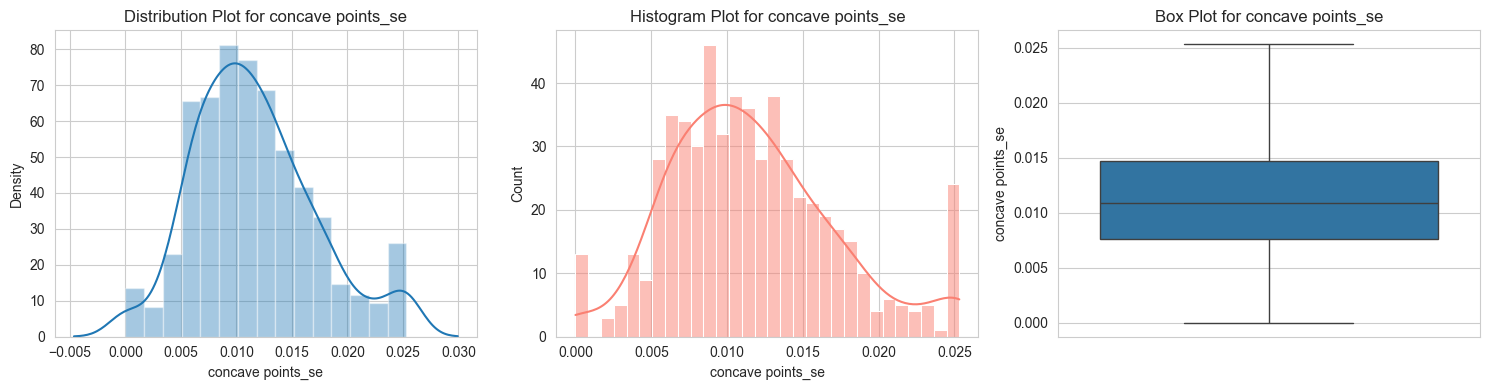

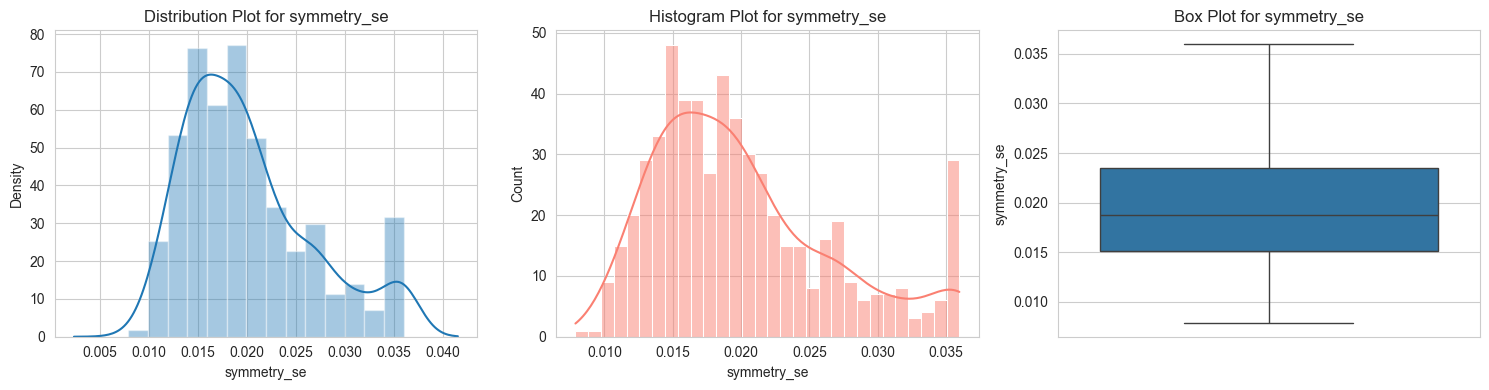

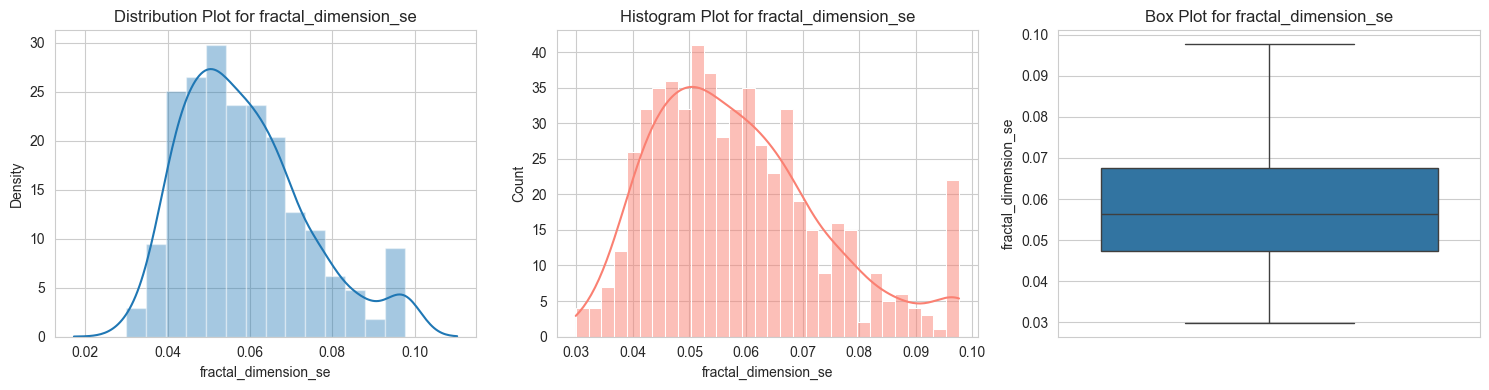

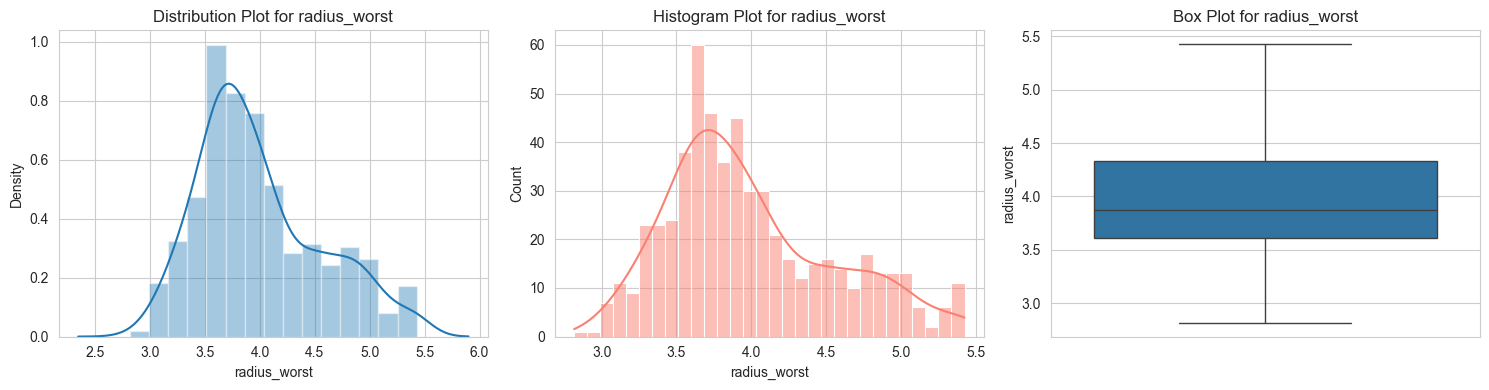

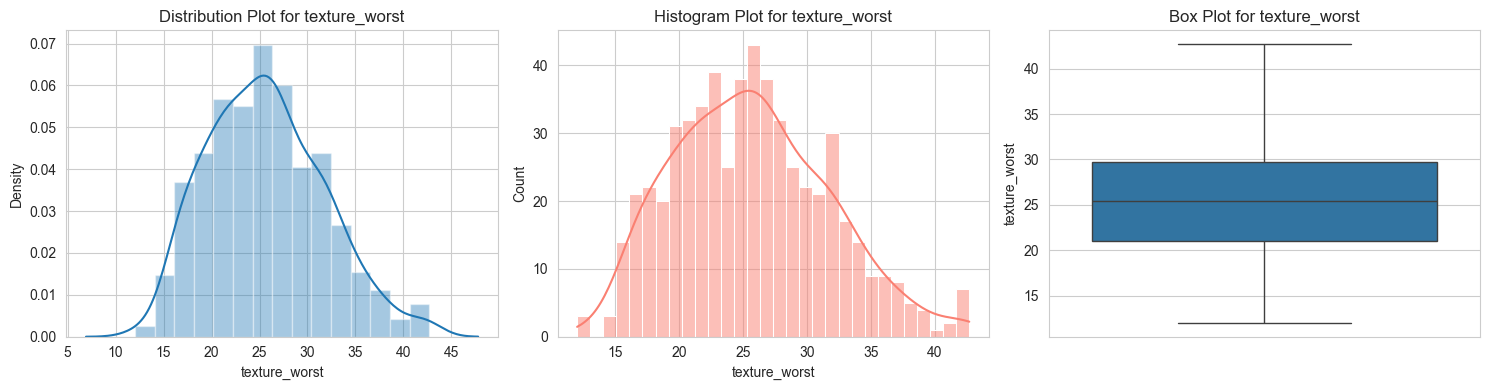

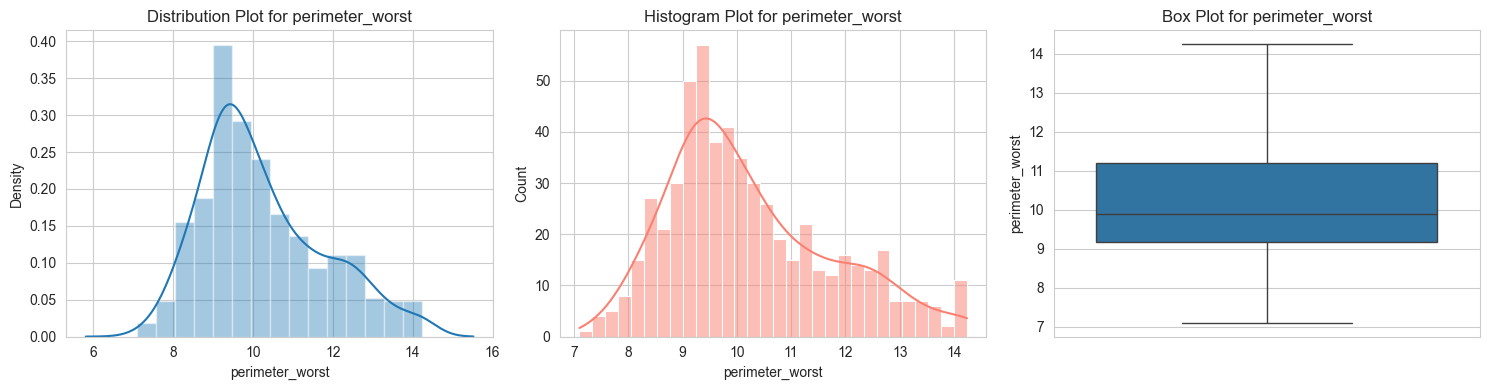

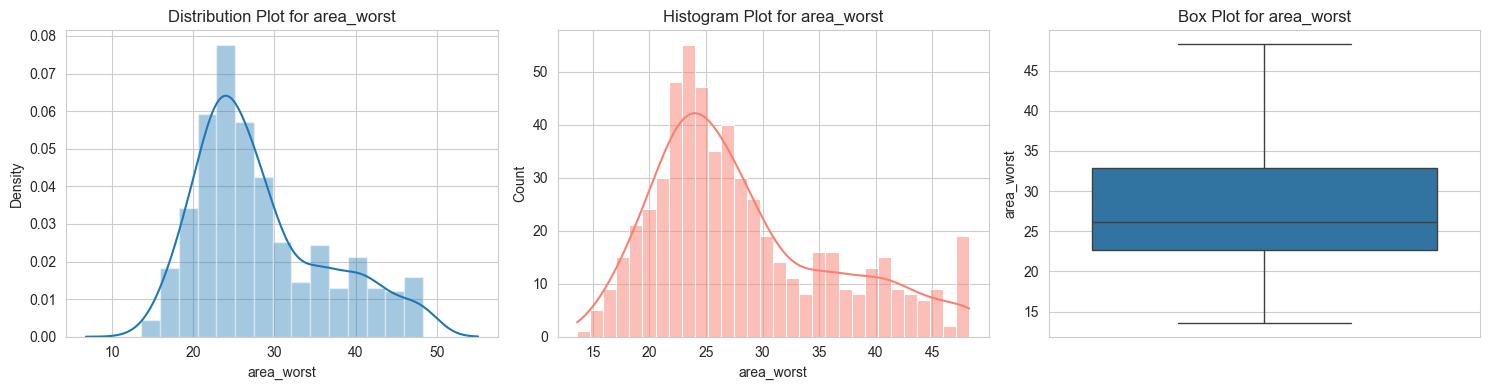

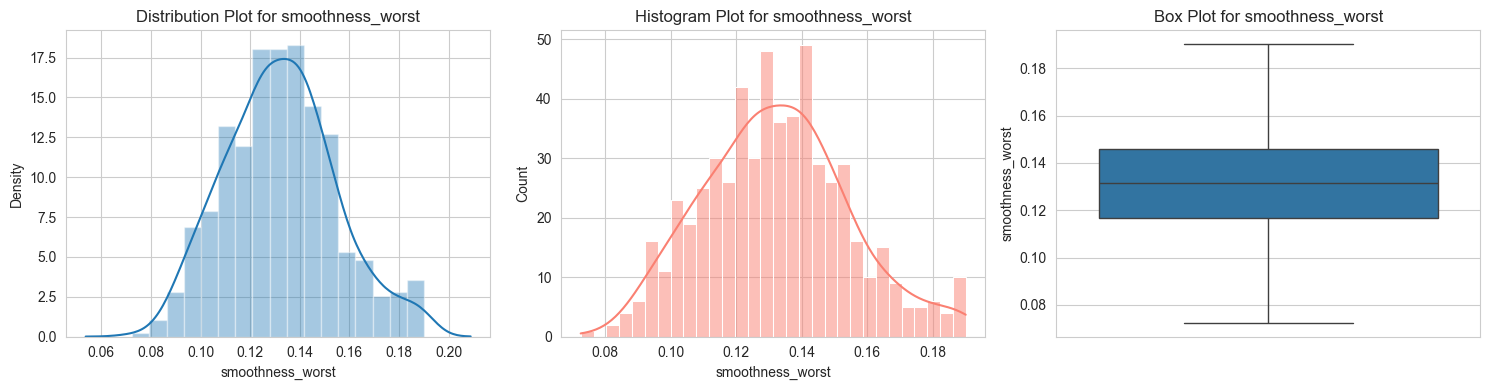

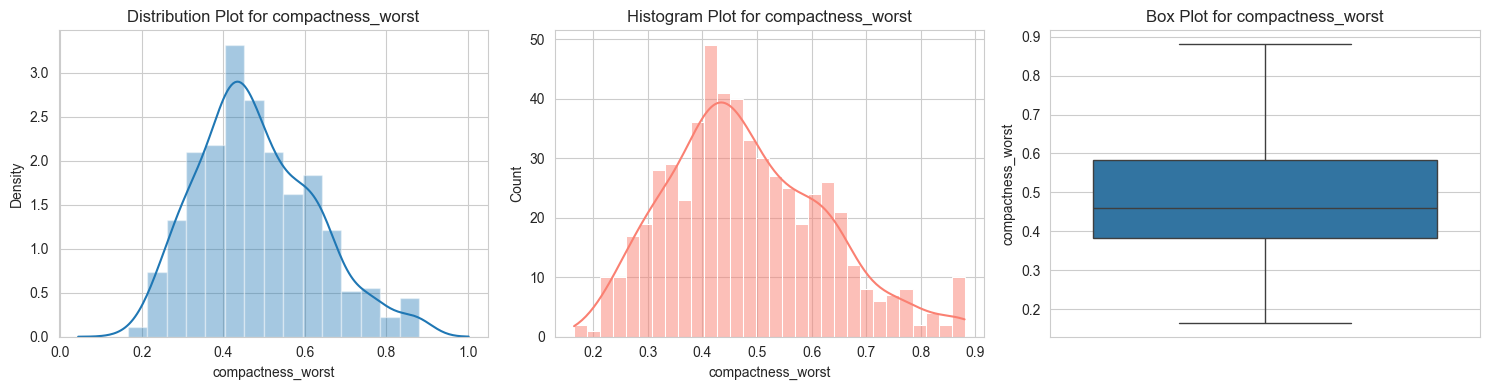

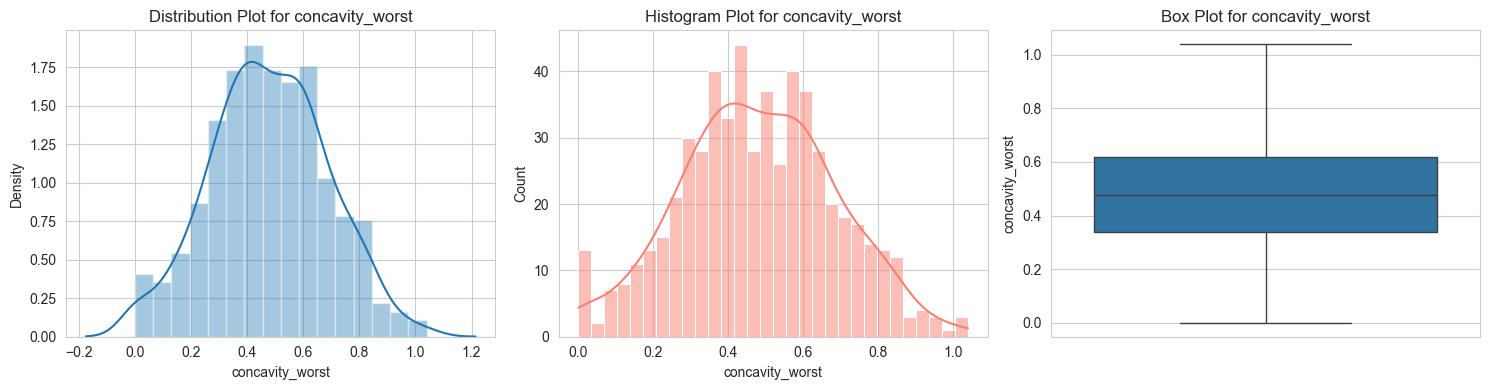

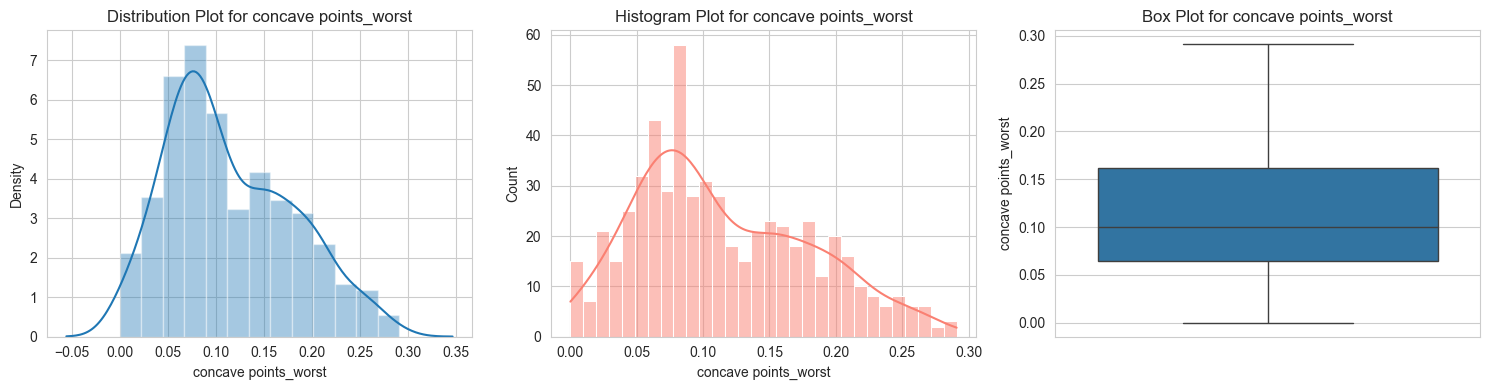

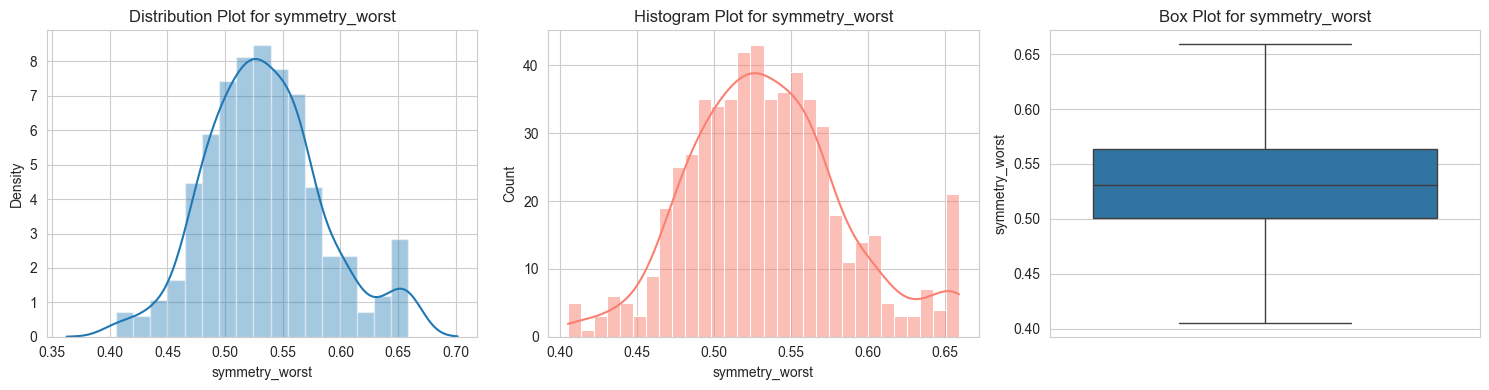

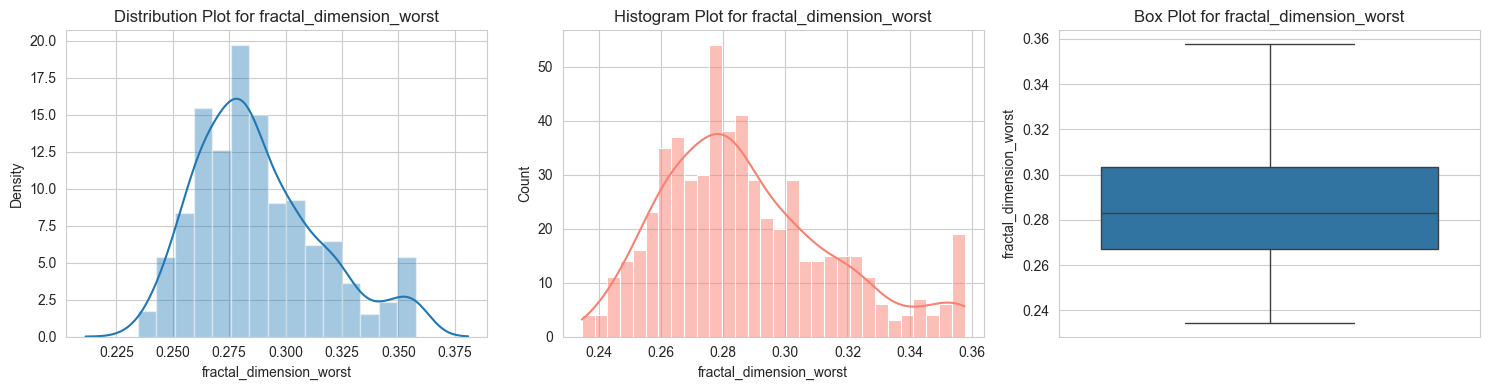

In [21]:
plot_distribution(df1,numerical_features)


In [22]:
df1.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [23]:
df2 = df1.copy()
df2.head()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80  31.638584   
1         M        20.57         17.77          132.90  36.414283   
2         M        19.69         21.25          130.00  34.684290   
3         M        11.42         20.38           77.58  19.649427   
4         M        20.29         14.34          135.10  36.013886   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.118400          0.520582        0.547814             0.383536   
1         0.084740          0.280428        0.294788             0.264896   
2         0.109600          0.399875        0.444297             0.357631   
3         0.133695          0.520582        0.491325             0.324345   
4         0.100300          0.364417        0.444972             0.322955   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...      5.037857          17.33        13.586758   
1         0.1812  ...      4.999000          23.41        12.601587   
2         0.2069  ...      4.854894          25.53        12.349089   
3         0.2464  ...      3.861347          26.50         9.943339   
4         0.1809  ...      4.747631          16.67        12.336936   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0   44.933284            0.1622           0.815843         0.843742   
1   44.226689            0.1238           0.431972         0.491528   
2   41.340053            0.1444           0.651537         0.671118   
3   23.826456            0.1901           0.880308         0.828794   
4   39.686270            0.1374           0.452769         0.632456   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654        0.658966                 0.344819  
1                0.1860        0.524404                 0.298362  
2                0.2430        0.601082                 0.295939  
3                0.2575        0.658966                 0.357637  
4                0.1625        0.486210                 0.277092  

[5 rows x 31 columns]

In [24]:
df2.dtypes


diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

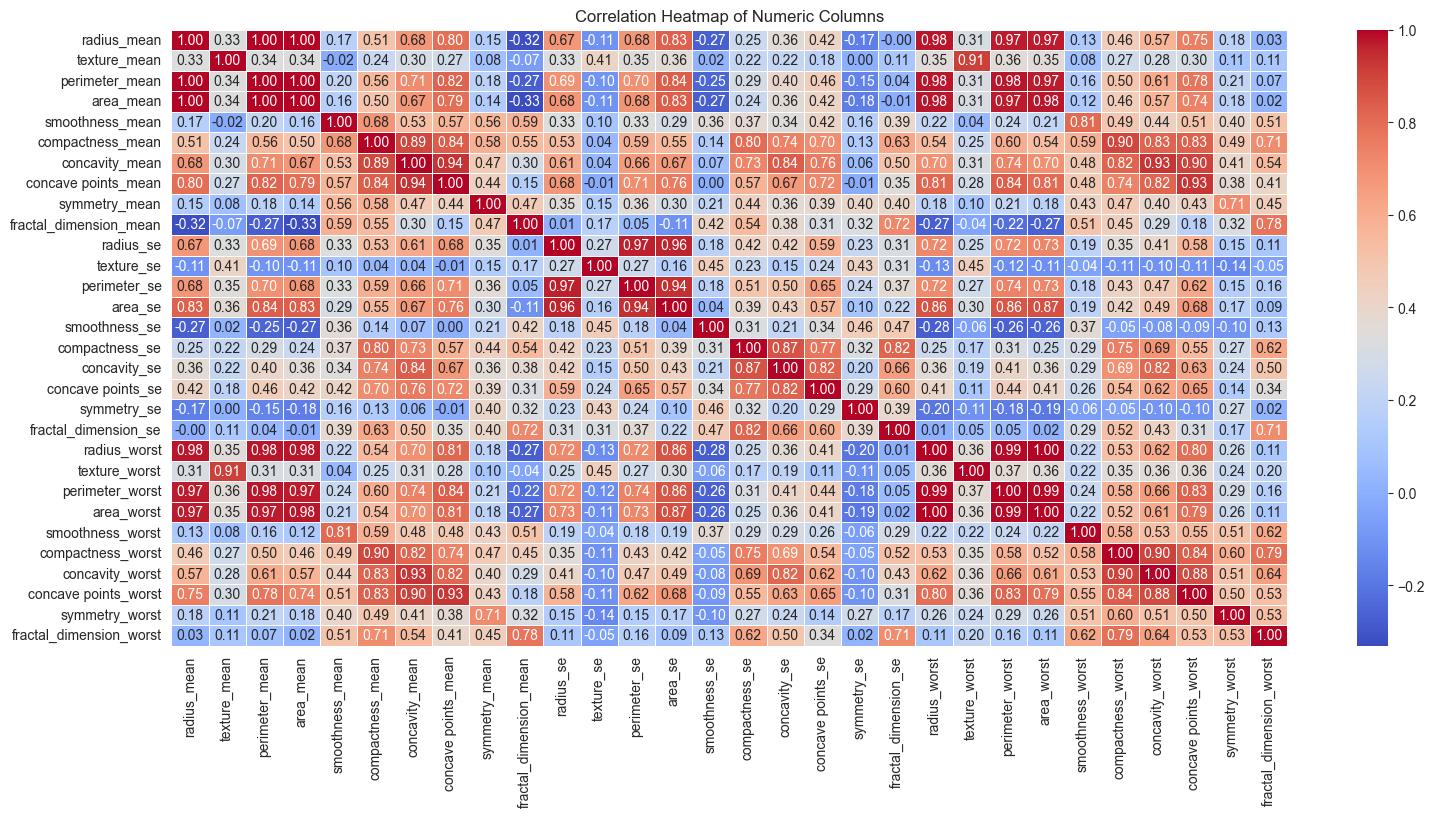

In [25]:
columns = df2.select_dtypes(include=['float64'])
corr = columns.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


In [26]:
df3 = df2.copy()
df3.head()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80  31.638584   
1         M        20.57         17.77          132.90  36.414283   
2         M        19.69         21.25          130.00  34.684290   
3         M        11.42         20.38           77.58  19.649427   
4         M        20.29         14.34          135.10  36.013886   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.118400          0.520582        0.547814             0.383536   
1         0.084740          0.280428        0.294788             0.264896   
2         0.109600          0.399875        0.444297             0.357631   
3         0.133695          0.520582        0.491325             0.324345   
4         0.100300          0.364417        0.444972             0.322955   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...      5.037857          17.33        13.586758   
1         0.1812  ...      4.999000          23.41        12.601587   
2         0.2069  ...      4.854894          25.53        12.349089   
3         0.2464  ...      3.861347          26.50         9.943339   
4         0.1809  ...      4.747631          16.67        12.336936   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0   44.933284            0.1622           0.815843         0.843742   
1   44.226689            0.1238           0.431972         0.491528   
2   41.340053            0.1444           0.651537         0.671118   
3   23.826456            0.1901           0.880308         0.828794   
4   39.686270            0.1374           0.452769         0.632456   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654        0.658966                 0.344819  
1                0.1860        0.524404                 0.298362  
2                0.2430        0.601082                 0.295939  
3                0.2575        0.658966                 0.357637  
4                0.1625        0.486210                 0.277092  

[5 rows x 31 columns]

In [27]:
print(df3['diagnosis'].value_counts())


diagnosis
B    357
M    212
Name: count, dtype: int64


In [28]:
label_encoder = LabelEncoder()
df3['diagnosis'] = label_encoder.fit_transform(df3['diagnosis'])


In [29]:
df3.groupby('diagnosis').mean()


radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                         
0            12.146524     17.903445       78.075406  21.279415   
1            17.290047     21.530259      114.224033  30.498206   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
0                 0.092400          0.277209        0.194512   
1                 0.102776          0.373905        0.389949   

           concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
0                     0.150849       0.174020                0.250057  ...   
1                     0.290963       0.192041                0.249738  ...   

           radius_worst  texture_worst  perimeter_worst  area_worst  \
diagnosis                                                             
0              3.647618      23.515070         9.299002   23.382185   
1              4.564526      29.240991        11.806901   36.573635   

           smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                         
0                  0.124934           0.414378         0.371871   
1                  0.144462           0.595183         0.657437   

           concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
0                      0.074444        0.518324                 0.280761  
1                      0.182237        0.561559                 0.299266  

[2 rows x 30 columns]

In [30]:
print(df3['diagnosis'].value_counts())


diagnosis
0    357
1    212
Name: count, dtype: int64


In [31]:
X = df3.drop(columns=['diagnosis'],axis=1)
y = df3['diagnosis']


In [32]:
file_path = r'C:\python\Breast_cancer.csv'
df2.to_csv(file_path, index=False)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
X_train


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79  15.827192          0.10660   
181       21.090         26.57          142.70  36.207734          0.11410   
63         9.173         13.86           59.20  16.152399          0.07721   
248       10.650         25.22           68.01  18.627936          0.09657   
60        10.170         14.88           64.55  17.660691          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79  15.620499          0.09783   
106       11.640         18.33           75.17  20.310096          0.11420   
270       14.290         16.82           90.30  25.151541          0.06429   
435       13.980         19.62           91.12  24.484689          0.10600   
102       12.180         20.52           77.22  21.417283          0.08013   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
68           0.375899        0.559464             0.209165         0.2111   
181          0.520582        0.498698             0.386782         0.2395   
63           0.295821        0.244704             0.147648         0.2341   
248          0.268961        0.154240             0.127083         0.1897   
60           0.283919        0.104115             0.113578         0.2464   
..                ...             ...                  ...            ...   
71           0.391280        0.293360             0.169470         0.1902   
106          0.318904        0.265895             0.186682         0.1801   
270          0.163554        0.085147             0.079057         0.1508   
435          0.336601        0.335559             0.254224         0.1669   
102          0.200948        0.154370             0.133041         0.1739   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
68                 0.282533  ...      3.210919          22.65   
181                0.271993  ...      5.165269          33.48   
63                 0.263875  ...      3.163858          19.23   
248                0.251575  ...      3.500000          35.19   
60                 0.263818  ...      3.319639          17.45   
..                      ...  ...           ...            ...   
71                 0.282533  ...      3.119776          15.67   
106                0.255343  ...      3.624914          29.26   
270                0.231862  ...      3.861347          20.65   
435                0.255812  ...      4.127953          30.80   
102                0.238265  ...      3.652396          32.84   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
68          8.093207   18.019434           0.14820           0.660681   
181        13.285330   45.705580           0.14910           0.870862   
63          8.098765   17.609656           0.09836           0.409634   
248         8.830629   21.347131           0.14990           0.373898   
60          8.358229   19.198958           0.12750           0.314102   
..               ...         ...               ...                ...   
71          7.909488   16.864163           0.12070           0.493559   
106         9.247162   22.840753           0.16880           0.515752   
270         9.718024   26.164862           0.08567           0.224410   
435        10.672394   29.483894           0.16130           0.597327   
102         9.196739   23.405128           0.11230           0.297691   

     concavity_worst  concave points_worst  symmetry_worst  \
68          1.039405               0.17500        0.650231   
181         0.823408               0.29030        0.640156   
63          0.373765               0.05087        0.572887   
248         0.335410               0.06136        0.583866   
60          0.147241               0.02579        0.596406   
..               ...                   ...             ...   
71          0.378682               0.04786        0

In [35]:
print(X_train.shape, X_test.shape)


(455, 30) (114, 30)


Feature Scaling

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Feature selection

In [37]:
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)


Support Vector Machine

In [38]:

param_grid_svm = {
    "kernel": ['linear', 'poly', 'rbf'],
    "degree": [1, 2, 3, 4],
    "gamma": [0.1, 1, 0.001],
    "C": [0.001, 0.01, 0.1, 1, 10, 100]
}

svm = SVC()
svm_grid_search = GridSearchCV(svm, param_grid_svm, cv=10, n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train_selected, y_train)


Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4], 'gamma': [0.1, 1, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [39]:
svm_grid_search.best_params_


{'C': 100, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Model Evaluation

In [40]:
svm_classifier = svm_grid_search.best_estimator_

y_pred_train = svm_classifier.predict(X_train_selected)#train_set
y_pred_test = svm_classifier.predict(X_test_selected)#test_set

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train:", accuracy_train)
print("Accuracy_Test:", accuracy_test)
print("")

print("Confusion_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true=y_test, y_pred=y_pred_test))
print("")

print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true=y_test, y_pred=y_pred_test))
print("")

print("Confusion_matrix for Train")
print("--------------------------")
print(confusion_matrix(y_true=y_train, y_pred=y_pred_train))
print("")

print("Classification_report for Train")
print("-------------------------------")
print(classification_report(y_true=y_train, y_pred=y_pred_train))


Accuracy score for Train and Test
----------------------------------
Accuracy_Train: 0.9824175824175824
Accuracy_Test: 0.9736842105263158

Confusion_matrix for Test
--------------------------
[[69  2]
 [ 1 42]]

Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion_matrix for Train
--------------------------
[[285   1]
 [  7 162]]

Classification_report for Train
-------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       286
           1       0.99      0.96      0.98       169

    accuracy                           0.98       455
   macro avg       0.98      0.98    

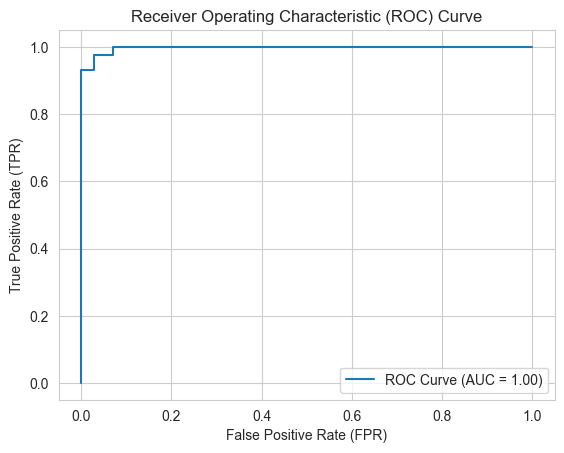

In [41]:
y_scores = svm_classifier.decision_function(X_test_selected)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)

auc = metrics.roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [42]:
svm_model_report = pd.DataFrame([{
    'Model': "Support Vector Machine",
    'ROC Score': auc,
    'Precision Score': metrics.precision_score(y_test, y_pred_test),
    'Recall Score': metrics.recall_score(y_test, y_pred_test),
    'F1 Score': metrics.f1_score(y_test, y_pred_test),
    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test)
}])

pd.set_option('display.width', 200)

print(svm_model_report)


                    Model  ROC Score  Precision Score  Recall Score  F1 Score  Accuracy Score
0  Support Vector Machine   0.997052         0.954545      0.976744  0.965517        0.973684


In [43]:

param_grid_rf = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [10, 15, 20, 25],
    'n_estimators': [25, 50, 100, 150],
    'bootstrap': [True, False],
    'max_features': ['auto', 'log2', None],
    'criterion': ['entropy', 'gini']
}

rf_classifier = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)

rf_grid_search.fit(X_train_selected, y_train)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_split': [10, 15, 20, 25],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=1)

In [44]:
rf_grid_search.best_params_


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_split': 20,
 'n_estimators': 25}

In [45]:
rf_classifier = rf_grid_search.best_estimator_

y_pred_train = rf_classifier.predict(X_train_selected)
y_pred_test = rf_classifier.predict(X_test_selected)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train:", accuracy_train)
print("Accuracy_Test:", accuracy_test)
print("")

# Print confusion matrix for test set
print("Confusion Matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true=y_test, y_pred=y_pred_test))
print("")

# Print classification report for test set
print("Classification Report for Test")
print("------------------------------")
print(classification_report(y_true=y_test, y_pred=y_pred_test))
print("")

# Print confusion matrix for train set
print("Confusion Matrix for Train")
print("---------------------------")
print(confusion_matrix(y_true=y_train, y_pred=y_pred_train))
print("")

# Print classification report for train set
print("Classification Report for Train")
print("------------------------------")
print(classification_report(y_true=y_train, y_pred=y_pred_train))


Accuracy score for Train and Test
----------------------------------
Accuracy_Train: 0.967032967032967
Accuracy_Test: 0.956140350877193

Confusion Matrix for Test
--------------------------
[[69  2]
 [ 3 40]]

Classification Report for Test
------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix for Train
---------------------------
[[280   6]
 [  9 160]]

Classification Report for Train
------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       286
           1       0.96      0.95      0.96       169

    accuracy                           0.97       455
   macro avg       0.97      0.96      0

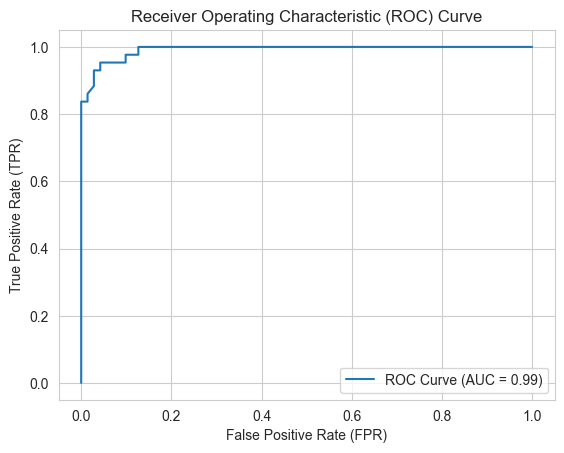

In [46]:
y_pred_proba = rf_classifier.predict_proba(X_test_selected)[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [47]:
RandomForest_model_report = pd.DataFrame([{
    'Model': "Random Forest Classifier",
    'ROC Score': auc,
    'Precision Score': metrics.precision_score(y_test, y_pred_test),
    'Recall Score': metrics.recall_score(y_test, y_pred_test),
    'F1 Score': metrics.f1_score(y_test, y_pred_test),
    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test)
}])

pd.set_option('display.width', 200)

print(RandomForest_model_report)


                      Model  ROC Score  Precision Score  Recall Score  F1 Score  Accuracy Score
0  Random Forest Classifier   0.991648         0.952381      0.930233  0.941176         0.95614


In [48]:
bagging_param_grid = {
    'n_estimators': [150, 200, 250, 300],
    'bootstrap': [True, False],
    'max_features': [1, 2, 3, 5, 10],
    'max_samples': [15, 20, 25, 30]
}

bagging_clf = BaggingClassifier(random_state=1)

grid_search_bagging = GridSearchCV(bagging_clf, param_grid=bagging_param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search_bagging.fit(X_train, y_train)


Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 5, 10],
                         'max_samples': [15, 20, 25, 30],
                         'n_estimators': [150, 200, 250, 300]},
             verbose=1)

In [49]:
grid_search_bagging.best_params_


{'bootstrap': True, 'max_features': 3, 'max_samples': 25, 'n_estimators': 250}

In [50]:
bagging_classifier = BaggingClassifier(n_estimators=250, max_samples=25, max_features=3, bootstrap=True, random_state=42)

bagging_classifier.fit(X_train_selected, y_train)


y_pred_train = bagging_classifier.predict(X_train_selected)
y_pred_test = bagging_classifier.predict(X_test_selected)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train:", accuracy_train)
print("Accuracy_Test:", accuracy_test)
print("")

# Print confusion matrix for test set
print("Confusion Matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true=y_test, y_pred=y_pred_test))
print("")

# Print classification report for test set
print("Classification Report for Test")
print("------------------------------")
print(classification_report(y_true=y_test, y_pred=y_pred_test))
print("")

# Print confusion matrix for train set
print("Confusion Matrix for Train")
print("---------------------------")
print(confusion_matrix(y_true=y_train, y_pred=y_pred_train))
print("")

# Print classification report for train set
print("Classification Report for Train")
print("------------------------------")
print(classification_report(y_true=y_train, y_pred=y_pred_train))


Accuracy score for Train and Test
----------------------------------
Accuracy_Train: 0.9384615384615385
Accuracy_Test: 0.956140350877193

Confusion Matrix for Test
--------------------------
[[71  0]
 [ 5 38]]

Classification Report for Test
------------------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix for Train
---------------------------
[[277   9]
 [ 19 150]]

Classification Report for Train
------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       286
           1       0.94      0.89      0.91       169

    accuracy                           0.94       455
   macro avg       0.94      0.93      

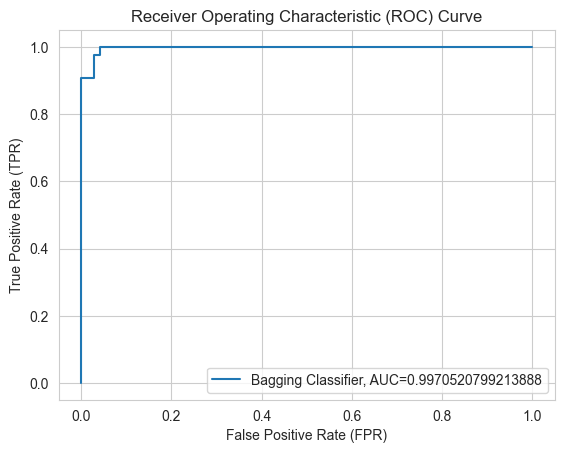

In [51]:
y_pred_proba_bagging = bagging_classifier.predict_proba(X_test_selected)[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_bagging)

auc_bagging = roc_auc_score(y_test, y_pred_proba_bagging)

# Plot ROC curve
plt.plot(fpr, tpr, label="Bagging Classifier, AUC="+str(auc_bagging))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [52]:
Bagging_model_report = pd.DataFrame([{
    'Model': "Bagging Classifier",
    'ROC Score': auc_bagging,
    'Precision Score': metrics.precision_score(y_test, y_pred_test),
    'Recall Score': metrics.recall_score(y_test, y_pred_test),
    'F1 Score': metrics.f1_score(y_test, y_pred_test),
    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test)
}])

pd.set_option('display.width', 200)

print(Bagging_model_report)


                Model  ROC Score  Precision Score  Recall Score  F1 Score  Accuracy Score
0  Bagging Classifier   0.997052              1.0      0.883721  0.938272         0.95614


Adaboost Classifier

In [53]:
adaboost_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

adaboost_clf = AdaBoostClassifier(random_state=1)
grid_search_adaboost = GridSearchCV(adaboost_clf, param_grid=adaboost_param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_adaboost.fit(X_train_selected, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [54]:
grid_search_adaboost.best_params_


{'learning_rate': 0.01, 'n_estimators': 150}

In [55]:
adaboost_classifier = grid_search_adaboost.best_estimator_

y_pred_train = adaboost_classifier.predict(X_train_selected)
y_pred_test = adaboost_classifier.predict(X_test_selected)

# Calculate accuracy scores
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train:", accuracy_train)
print("Accuracy_Test:", accuracy_test)
print("")

# Print confusion matrix for test set
print("Confusion Matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true=y_test, y_pred=y_pred_test))
print("")

# Print classification report for test set
print("Classification Report for Test")
print("------------------------------")
print(classification_report(y_true=y_test, y_pred=y_pred_test))
print("")

# Print confusion matrix for train set
print("Confusion Matrix for Train")
print("---------------------------")
print(confusion_matrix(y_true=y_train, y_pred=y_pred_train))
print("")

# Print classification report for train set
print("Classification Report for Train")
print("------------------------------")
print(classification_report(y_true=y_train, y_pred=y_pred_train))


Accuracy score for Train and Test
----------------------------------
Accuracy_Train: 0.9538461538461539
Accuracy_Test: 0.956140350877193

Confusion Matrix for Test
--------------------------
[[69  2]
 [ 3 40]]

Classification Report for Test
------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix for Train
---------------------------
[[279   7]
 [ 14 155]]

Classification Report for Train
------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       286
           1       0.96      0.92      0.94       169

    accuracy                           0.95       455
   macro avg       0.95      0.95      

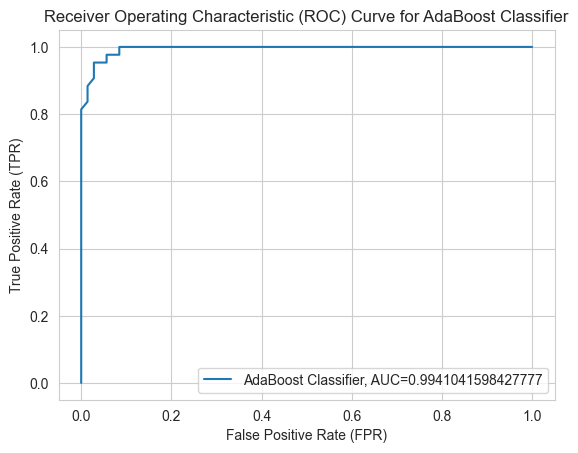

In [56]:
y_pred_proba_adaboost = adaboost_classifier.predict_proba(X_test_selected)[:, 1]

fpr_adaboost, tpr_adaboost, _ = metrics.roc_curve(y_test, y_pred_proba_adaboost)

auc_adaboost = metrics.roc_auc_score(y_test, y_pred_proba_adaboost)

plt.plot(fpr_adaboost, tpr_adaboost, label="AdaBoost Classifier, AUC="+str(auc_adaboost))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost Classifier')
plt.legend(loc="lower right")
plt.show()


In [57]:
Adaboost_model_report = pd.DataFrame([{
    'Model': "AdaBoost Classifier",  
    'ROC Score': auc_adaboost,
    'Precision Score': metrics.precision_score(y_test, y_pred_test),
    'Recall Score': metrics.recall_score(y_test, y_pred_test),
    'F1 Score': metrics.f1_score(y_test, y_pred_test),
    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test)
}])

pd.set_option('display.width', 200)

print(Adaboost_model_report)


                 Model  ROC Score  Precision Score  Recall Score  F1 Score  Accuracy Score
0  AdaBoost Classifier   0.994104         0.952381      0.930233  0.941176         0.95614


Model Summary Report

In [58]:
model_reports = pd.concat([svm_model_report, RandomForest_model_report, Bagging_model_report, Adaboost_model_report], ignore_index=True)
print(model_reports)


                      Model  ROC Score  Precision Score  Recall Score  F1 Score  Accuracy Score
0    Support Vector Machine   0.997052         0.954545      0.976744  0.965517        0.973684
1  Random Forest Classifier   0.991648         0.952381      0.930233  0.941176        0.956140
2        Bagging Classifier   0.997052         1.000000      0.883721  0.938272        0.956140
3       AdaBoost Classifier   0.994104         0.952381      0.930233  0.941176        0.956140


In [59]:
user_data = np.array([[1.429078622, 2.905680609, 1.873941673, 3.622482575, 0.061542796, 0.068322945, 0.07187815, 0.044794929, 0.093204366, 0.017319082]])

y_pred_user = svm_classifier.predict(user_data)

if y_pred_user == 0:
    print("Malignant (M)")
else:
    print("Benign (B)")


Malignant (M)


In [60]:
import pickle
file_path = r'C:\python\Svmmodel.pkl'
with open(file_path, "wb") as f:
    pickle.dump(svm_classifier, f)
